In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fdf_2023 = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\CBS_2023.csv', low_memory=False, sep=",")
fdf_2023.head()

ride_id  rideable_type           started_at             ended_at  \
0  6226664  electric_bike  2023-01-01 00:00:03  2023-01-01 00:53:50   
1  6226665   classic_bike  2023-01-01 00:03:48  2023-01-01 00:41:23   
2  6226666  electric_bike  2023-01-01 00:03:53  2023-01-01 00:26:43   
3  6226667  electric_bike  2023-01-01 00:05:08  2023-01-01 00:16:09   
4  6226668   classic_bike  2023-01-01 00:05:36  2023-01-01 00:32:44   

     start_station_name  start_station_id         end_station_name  \
0                     0               0.0  North Capitol & R St NE   
1      Lincoln Memorial           31258.0           20th & E St NW   
2                     0               0.0                        0   
3  14th & Belmont St NW           31119.0      16th & Irving St NW   
4      Lincoln Memorial           31258.0    S Troy St & 26th St S   

   end_station_id  start_lat  start_lng  ...    end_lng  member_casual  \
0         31527.0  38.890000 -77.030000  ... -77.008911         casual   
1         31204.0  38.888255 -77.049436  ... -77.045000         member   
2             0.0  38.910000 -77.000000  ... -77.000000         member   
3         31122.0  38.921118 -77.031776  ... -77.036250         member   
4         31056.0  38.888255 -77.049436  ... -77.075104         casual   

   distance  month  year  season day_of_week holiday is_weekend  \
0  3.133910      1  2023  Winter      Sunday     Yes        Yes   
1  0.973483      1  2023  Winter      Sunday     Yes        Yes   
2  0.000000      1  2023  Winter      Sunday     Yes        Yes   
3  0.947218      1  2023  Winter      Sunday     Yes        Yes   
4  4.999691      1  2023  Winter      Sunday     Yes        Yes   

     ride_duration  
0  0 days 00:53:47  
1  0 days 00:37:35  
2  0 days 00:22:50  
3  0 days 00:11:01  
4  0 days 00:27:08  

[5 rows x 21 columns]

In [4]:
# Convert categorical columns to category type for memory efficiency
fdf_2023["rideable_type"] = fdf_2023["rideable_type"].astype("category")
fdf_2023["start_station_name"] = fdf_2023["start_station_name"].astype("category")
fdf_2023["end_station_name"] = fdf_2023["end_station_name"].astype("category")
fdf_2023["member_casual"] = fdf_2023["member_casual"].astype("category")
fdf_2023["day_of_week"] = fdf_2023["day_of_week"].astype("category")
fdf_2023["holiday"] = fdf_2023["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf_2023['started_at'] = pd.to_datetime(fdf_2023['started_at'])
fdf_2023['ended_at'] = pd.to_datetime(fdf_2023['ended_at'])


fdf_2023['month'] = fdf_2023['month'].astype('int8')
fdf_2023["year"] = fdf_2023["year"].astype("str")

fdf_2023["ride_duration"] = pd.to_timedelta(fdf_2023["ride_duration"])

In [5]:
fdf_2023.dtypes

ride_id                         int64
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id              float64
end_station_name             category
end_station_id                float64
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
distance                      float64
month                            int8
year                           object
season                         object
day_of_week                  category
holiday                      category
is_weekend                     object
ride_duration         timedelta64[ns]
dtype: object

In [6]:
fdf_2023_sampled = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\Project 3\CBS_2023_sample.csv', low_memory=False, sep=",")
fdf_2023_sampled.head()

ride_id  rideable_type           started_at             ended_at  \
0  8727012   classic_bike  2023-08-06 07:44:54  2023-08-06 07:46:02   
1  7368109  electric_bike  2023-05-05 10:57:59  2023-05-05 11:21:16   
2  6480084   classic_bike  2023-02-08 17:29:29  2023-02-08 17:52:32   
3  6546649   classic_bike  2023-02-17 10:40:44  2023-02-17 10:52:14   
4  8494852   classic_bike  2023-07-21 21:31:20  2023-07-21 21:38:29   

                         start_station_name  start_station_id  \
0  Rosslyn Metro / Wilson Blvd & N Moore St           31947.0   
1                                         0               0.0   
2                        Hamlin & 7th St NE           31514.0   
3                    Eckington Pl & Q St NE           31505.0   
4            New Hampshire Ave & Ward Pl NW           31212.0   

                end_station_name  end_station_id  start_lat  start_lng  ...  \
0       Wilson Blvd & Ft Myer Dr         31015.0  38.896087 -77.071452  ...   
1  17th St & Rhode Island Ave NW         31210.0  38.880000 -77.010000  ...   
2    Adams Mill & Columbia Rd NW         31104.0  38.927497 -76.997194  ...   
3       New Jersey Ave & F St NW         31655.0  38.910972 -77.004950  ...   
4                 16th & R St NW         31282.0  38.905711 -77.047318  ...   

     end_lng  member_casual  distance  month  year  season day_of_week  \
0 -77.072305         member  0.181063      8  2023  Summer      Sunday   
1 -77.038627         member  3.872587      5  2023  Spring      Friday   
2 -77.042525         casual  3.955272      2  2023  Winter   Wednesday   
3 -77.011616         member  1.645987      2  2023  Winter      Friday   
4 -77.036278         casual  1.228064      7  2023  Summer      Friday   

  holiday is_weekend    ride_duration  
0      No        Yes  0 days 00:01:08  
1      No         No  0 days 00:23:17  
2      No         No  0 days 00:23:03  
3      No         No  0 days 00:11:30  
4      No         No  0 days 00:07:09  

[5 rows x 21 columns]

In [7]:
# Convert categorical columns to category type for memory efficiency
fdf_2023_sampled["rideable_type"] = fdf_2023_sampled["rideable_type"].astype("category")
fdf_2023_sampled["start_station_name"] = fdf_2023_sampled["start_station_name"].astype("category")
fdf_2023_sampled["end_station_name"] = fdf_2023_sampled["end_station_name"].astype("category")
fdf_2023_sampled["member_casual"] = fdf_2023_sampled["member_casual"].astype("category")
fdf_2023_sampled["day_of_week"] = fdf_2023_sampled["day_of_week"].astype("category")
fdf_2023_sampled["holiday"] = fdf_2023_sampled["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf_2023_sampled['started_at'] = pd.to_datetime(fdf_2023_sampled['started_at'])
fdf_2023_sampled['ended_at'] = pd.to_datetime(fdf_2023_sampled['ended_at'])


fdf_2023_sampled['month'] = fdf_2023_sampled['month'].astype('int8')
fdf_2023_sampled["year"] = fdf_2023_sampled["year"].astype("str")

fdf_2023_sampled["ride_duration"] = pd.to_timedelta(fdf_2023_sampled["ride_duration"])

In [8]:
fdf_2023_sampled.head()

ride_id  rideable_type          started_at            ended_at  \
0  8727012   classic_bike 2023-08-06 07:44:54 2023-08-06 07:46:02   
1  7368109  electric_bike 2023-05-05 10:57:59 2023-05-05 11:21:16   
2  6480084   classic_bike 2023-02-08 17:29:29 2023-02-08 17:52:32   
3  6546649   classic_bike 2023-02-17 10:40:44 2023-02-17 10:52:14   
4  8494852   classic_bike 2023-07-21 21:31:20 2023-07-21 21:38:29   

                         start_station_name  start_station_id  \
0  Rosslyn Metro / Wilson Blvd & N Moore St           31947.0   
1                                         0               0.0   
2                        Hamlin & 7th St NE           31514.0   
3                    Eckington Pl & Q St NE           31505.0   
4            New Hampshire Ave & Ward Pl NW           31212.0   

                end_station_name  end_station_id  start_lat  start_lng  ...  \
0       Wilson Blvd & Ft Myer Dr         31015.0  38.896087 -77.071452  ...   
1  17th St & Rhode Island Ave NW         31210.0  38.880000 -77.010000  ...   
2    Adams Mill & Columbia Rd NW         31104.0  38.927497 -76.997194  ...   
3       New Jersey Ave & F St NW         31655.0  38.910972 -77.004950  ...   
4                 16th & R St NW         31282.0  38.905711 -77.047318  ...   

     end_lng  member_casual  distance  month  year  season day_of_week  \
0 -77.072305         member  0.181063      8  2023  Summer      Sunday   
1 -77.038627         member  3.872587      5  2023  Spring      Friday   
2 -77.042525         casual  3.955272      2  2023  Winter   Wednesday   
3 -77.011616         member  1.645987      2  2023  Winter      Friday   
4 -77.036278         casual  1.228064      7  2023  Summer      Friday   

  holiday is_weekend   ride_duration  
0      No        Yes 0 days 00:01:08  
1      No         No 0 days 00:23:17  
2      No         No 0 days 00:23:03  
3      No         No 0 days 00:11:30  
4      No         No 0 days 00:07:09  

[5 rows x 21 columns]

In [9]:
fdf_2023_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116834 entries, 0 to 1116833
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   ride_id             1116834 non-null  int64          
 1   rideable_type       1116834 non-null  category       
 2   started_at          1116834 non-null  datetime64[ns] 
 3   ended_at            1116834 non-null  datetime64[ns] 
 4   start_station_name  1116834 non-null  category       
 5   start_station_id    1116834 non-null  float64        
 6   end_station_name    1116834 non-null  category       
 7   end_station_id      1116834 non-null  float64        
 8   start_lat           1116834 non-null  float64        
 9   start_lng           1116834 non-null  float64        
 10  end_lat             1116834 non-null  float64        
 11  end_lng             1116834 non-null  float64        
 12  member_casual       1116834 non-null  category       
 1

In [10]:
pip install geopandas shapely pandas


Note: you may need to restart the kernel to use updated packages.


In [11]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the wards GeoJSON file
wards_gdf = gpd.read_file("wards_from_2022.geojson")

# Load the bike-sharing dataset
df_2023_sampled = pd.read_csv(r"C:\Users\raclo\Documents\Bootcamp\Project 3\CBS_2023_sample.csv")  # Adjust if it's not in CSV format

# Convert DataFrame to GeoDataFrame using start station coordinates
df_2023_sampled["geometry"] = df_2023_sampled.apply(lambda row: Point(row["start_lng"], row["start_lat"]), axis=1)
gdf = gpd.GeoDataFrame(df_2023_sampled, geometry="geometry", crs="EPSG:4326")  # Assuming WGS84 projection

# Perform spatial join to get the corresponding ward for each station
gdf = gpd.sjoin(gdf, wards_gdf, how="left", predicate="within")

# Keep only necessary columns
gdf = gdf[["ride_id", "start_station_name", "WARD", "NAME"]]

# Save to a new CSV or use further
gdf.to_csv("bikesharing_with_wards.csv", index=False)

In [12]:
gdf

ride_id                                 start_station_name  WARD  \
0        8727012           Rosslyn Metro / Wilson Blvd & N Moore St   NaN   
1        7368109                                                  0   6.0   
2        6480084                                 Hamlin & 7th St NE   5.0   
3        6546649                             Eckington Pl & Q St NE   5.0   
4        8494852                     New Hampshire Ave & Ward Pl NW   2.0   
...          ...                                                ...   ...   
1116829  7539054  Loughboro Rd & Dalecarlia Pkwy NW / Sibley Hos...   3.0   
1116830  9710112                                      6th & H St NE   6.0   
1116831  7412461                        18th & New Hampshire Ave NW   2.0   
1116832  6404110                          Connecticut Ave & R St NW   2.0   
1116833  7982601                      George Mason Dr & Wilson Blvd   NaN   

           NAME  
0           NaN  
1        Ward 6  
2        Ward 5  
3        Ward 5  
4        Ward 2  
...         ...  
1116829  Ward 3  
1116830  Ward 6  
1116831  Ward 2  
1116832  Ward 2  
1116833     NaN  

[1116834 rows x 4 columns]

In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


In [14]:
# Load the bikesharing dataset
fdf = pd.read_csv("CBS_2023_sample.csv")  # Adjust format if needed

# Load the wards GeoJSON
wards = gpd.read_file("wards_from_2022.geojson")

In [15]:
# Convert start station coordinates to geometry points
fdf['geometry'] = fdf.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)

# Convert to GeoDataFrame
fdf_gdf = gpd.GeoDataFrame(fdf, geometry='geometry', crs="EPSG:4326")


In [16]:
fdf_gdf = gpd.sjoin(fdf_gdf, wards[['WARD', 'geometry']], how="left", predicate="within")

# Rename the column for clarity
fdf_gdf.rename(columns={'WARD': 'start_ward'}, inplace=True)


In [17]:
# Convert end station coordinates to geometry points
fdf['end_geometry'] = fdf.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)

# Convert to GeoDataFrame
fdf_gdf_end = gpd.GeoDataFrame(fdf, geometry='end_geometry', crs="EPSG:4326")

# Spatial join for end stations
fdf_gdf_end = gpd.sjoin(fdf_gdf_end, wards[['WARD', 'geometry']], how="left", predicate="within")

# Rename column
fdf_gdf_end.rename(columns={'WARD': 'end_ward'}, inplace=True)

# Merge back with the main dataset
fdf_gdf['end_ward'] = fdf_gdf_end['end_ward']


In [18]:
fdf_gdf.head()

ride_id  rideable_type           started_at             ended_at  \
0  8727012   classic_bike  2023-08-06 07:44:54  2023-08-06 07:46:02   
1  7368109  electric_bike  2023-05-05 10:57:59  2023-05-05 11:21:16   
2  6480084   classic_bike  2023-02-08 17:29:29  2023-02-08 17:52:32   
3  6546649   classic_bike  2023-02-17 10:40:44  2023-02-17 10:52:14   
4  8494852   classic_bike  2023-07-21 21:31:20  2023-07-21 21:38:29   

                         start_station_name  start_station_id  \
0  Rosslyn Metro / Wilson Blvd & N Moore St           31947.0   
1                                         0               0.0   
2                        Hamlin & 7th St NE           31514.0   
3                    Eckington Pl & Q St NE           31505.0   
4            New Hampshire Ave & Ward Pl NW           31212.0   

                end_station_name  end_station_id  start_lat  start_lng  ...  \
0       Wilson Blvd & Ft Myer Dr         31015.0  38.896087 -77.071452  ...   
1  17th St & Rhode Island Ave NW         31210.0  38.880000 -77.010000  ...   
2    Adams Mill & Columbia Rd NW         31104.0  38.927497 -76.997194  ...   
3       New Jersey Ave & F St NW         31655.0  38.910972 -77.004950  ...   
4                 16th & R St NW         31282.0  38.905711 -77.047318  ...   

   year  season day_of_week  holiday  is_weekend    ride_duration  \
0  2023  Summer      Sunday       No         Yes  0 days 00:01:08   
1  2023  Spring      Friday       No          No  0 days 00:23:17   
2  2023  Winter   Wednesday       No          No  0 days 00:23:03   
3  2023  Winter      Friday       No          No  0 days 00:11:30   
4  2023  Summer      Friday       No          No  0 days 00:07:09   

                     geometry index_right start_ward end_ward  
0  POINT (-77.07145 38.89609)         NaN        NaN      NaN  
1        POINT (-77.01 38.88)         1.0        6.0      2.0  
2   POINT (-76.99719 38.9275)         5.0        5.0      1.0  
3  POINT (-77.00495 38.91097)         5.0        5.0      6.0  
4  POINT (-77.04732 38.90571)         3.0        2.0      2.0  

[5 rows x 25 columns]

In [19]:
print(fdf_gdf['start_ward'].isna().sum())
print(fdf_gdf['end_ward'].isna().sum())

134583
134016


In [20]:
fdf_gdf.dropna(subset=['start_ward', 'end_ward'], inplace=True)


In [21]:
fdf_gdf.drop(columns=['index_right', 'geometry'], inplace=True)


In [22]:
fdf_gdf.head()

ride_id  rideable_type           started_at             ended_at  \
1  7368109  electric_bike  2023-05-05 10:57:59  2023-05-05 11:21:16   
2  6480084   classic_bike  2023-02-08 17:29:29  2023-02-08 17:52:32   
3  6546649   classic_bike  2023-02-17 10:40:44  2023-02-17 10:52:14   
4  8494852   classic_bike  2023-07-21 21:31:20  2023-07-21 21:38:29   
5  7259139  electric_bike  2023-04-25 15:25:44  2023-04-25 15:27:07   

               start_station_name  start_station_id  \
1                               0               0.0   
2              Hamlin & 7th St NE           31514.0   
3          Eckington Pl & Q St NE           31505.0   
4  New Hampshire Ave & Ward Pl NW           31212.0   
5                               0               0.0   

                end_station_name  end_station_id  start_lat  start_lng  ...  \
1  17th St & Rhode Island Ave NW         31210.0  38.880000 -77.010000  ...   
2    Adams Mill & Columbia Rd NW         31104.0  38.927497 -76.997194  ...   
3       New Jersey Ave & F St NW         31655.0  38.910972 -77.004950  ...   
4                 16th & R St NW         31282.0  38.905711 -77.047318  ...   
5                              0             0.0  38.910000 -77.040000  ...   

   distance  month  year  season  day_of_week  holiday is_weekend  \
1  3.872587      5  2023  Spring       Friday       No         No   
2  3.955272      2  2023  Winter    Wednesday       No         No   
3  1.645987      2  2023  Winter       Friday       No         No   
4  1.228064      7  2023  Summer       Friday       No         No   
5  0.000000      4  2023  Spring      Tuesday       No         No   

     ride_duration start_ward end_ward  
1  0 days 00:23:17        6.0      2.0  
2  0 days 00:23:03        5.0      1.0  
3  0 days 00:11:30        5.0      6.0  
4  0 days 00:07:09        2.0      2.0  
5  0 days 00:01:23        2.0      2.0  

[5 rows x 23 columns]

In [23]:
fdf_gdf['start_ward'] = fdf_gdf['start_ward'].astype('int')
fdf_gdf['end_ward'] = fdf_gdf['end_ward'].astype('int')

In [24]:
unique_values_start = sorted(fdf_gdf['start_ward'].unique())
unique_values_end = sorted(fdf_gdf['end_ward'].unique())
print(unique_values_start)
print(unique_values_end)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


In [25]:
start_ward_counts = fdf_gdf['start_ward'].value_counts().sort_index(ascending=True)
end_ward_counts = fdf_gdf['end_ward'].value_counts().sort_index(ascending=True)

# If you want to display them together:
print("Start Ward Counts:\n", start_ward_counts)
print("End Ward Counts:\n", end_ward_counts)


Start Ward Counts:
 start_ward
1    156215
2    397319
3     27455
4     30805
5     75040
6    240795
7     14051
8     18558
Name: count, dtype: int64
End Ward Counts:
 end_ward
1    139422
2    412712
3     24403
4     28234
5     74130
6    246587
7     14369
8     20381
Name: count, dtype: int64


In [26]:
print(f"Number of rows before cleaning: {len(fdf_gdf)}")

Number of rows before cleaning: 960238


In [27]:
# Convert 'ride_duration' column to Timedelta if it's not already
fdf_gdf["ride_duration"] = pd.to_timedelta(fdf_gdf["ride_duration"], errors='coerce')


In [28]:
# Drop rows where ride_duration is negative (1052)

fdf_gdf = fdf_gdf[fdf_gdf["ride_duration"] >= pd.Timedelta(0)]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf)}")

Number of rows after cleaning: 960096


In [29]:
# Overwrite fdf_gdf by dropping rows where 'end_station_name' is '0'
fdf_gdf = fdf_gdf[fdf_gdf["end_station_name"] != "0"]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf)}")

Number of rows after cleaning: 871520


In [30]:
# Overwrite fdf_gdf by dropping rows where "ride_distance" is 0
fdf_gdf = fdf_gdf[fdf_gdf["distance"] != 0]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf)}")

Number of rows after cleaning: 839830


In [31]:
# If ride_duration is in Timedelta format, create ride_duration_min
fdf_gdf["ride_duration_min"] = fdf_gdf["ride_duration"].dt.total_seconds() / 60


In [32]:
# Drop rows where ride_duration_min is 0
fdf_gdf = fdf_gdf[fdf_gdf["ride_duration_min"] != 0]

# Optionally, check the result
print(f"Number of rows after cleaning: {len(fdf_gdf)}")

Number of rows after cleaning: 839783


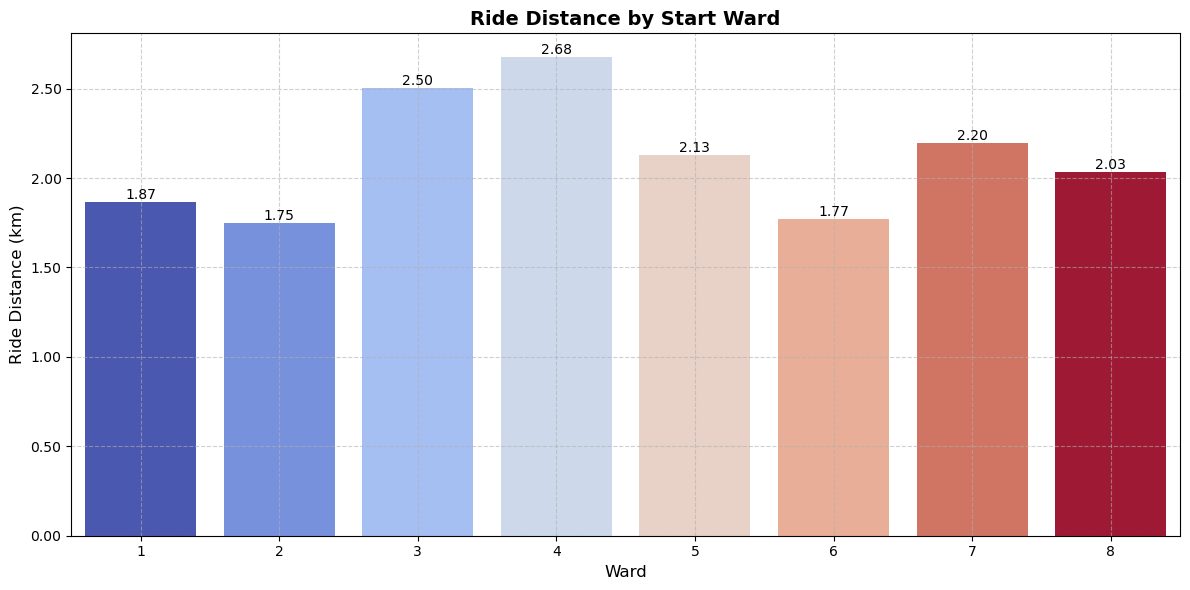

In [33]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create the bar plot 
ax = sns.barplot(x="start_ward", 
                y="distance", 
                data=fdf_gdf,
                palette="coolwarm",
                hue="start_ward",  # Add hue to group by start_ward
                errorbar=None,
                legend=False 
                )  

# Format y-axis to show two decimals
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    # Ensure the value is not too small (and avoid labeling near-zero heights)
    if height > 0.01:
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # Offset the text a little above the bar
                    textcoords='offset points')

# Improve labels and title
plt.xlabel("Ward", fontsize=12)
plt.ylabel("Ride Distance (km)", fontsize=12)
plt.title("Ride Distance by Start Ward", fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()  # Ensures that everything fits without overlapping
plt.show()



In [34]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create the bar plot 
ax = sns.barplot(x="end_ward", 
                y="distance", 
                data=fdf_gdf,
                palette="coolwarm",
                hue="end_ward", 
                errorbar=None,
                legend=False 
                )  

# Format y-axis to show two decimals
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    # Ensure the value is not too small (and avoid labeling near-zero heights)
    if height > 0.01:
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # Offset the text a little above the bar
                    textcoords='offset points')

# Improve labels and title
plt.xlabel("Ward", fontsize=12)
plt.ylabel("Ride Distance (km)", fontsize=12)
plt.title("Ride Distance by End Ward", fontsize=14, fontweight="bold")

# Show the plot
plt.tight_layout()  # Ensures that everything fits without overlapping
plt.show()


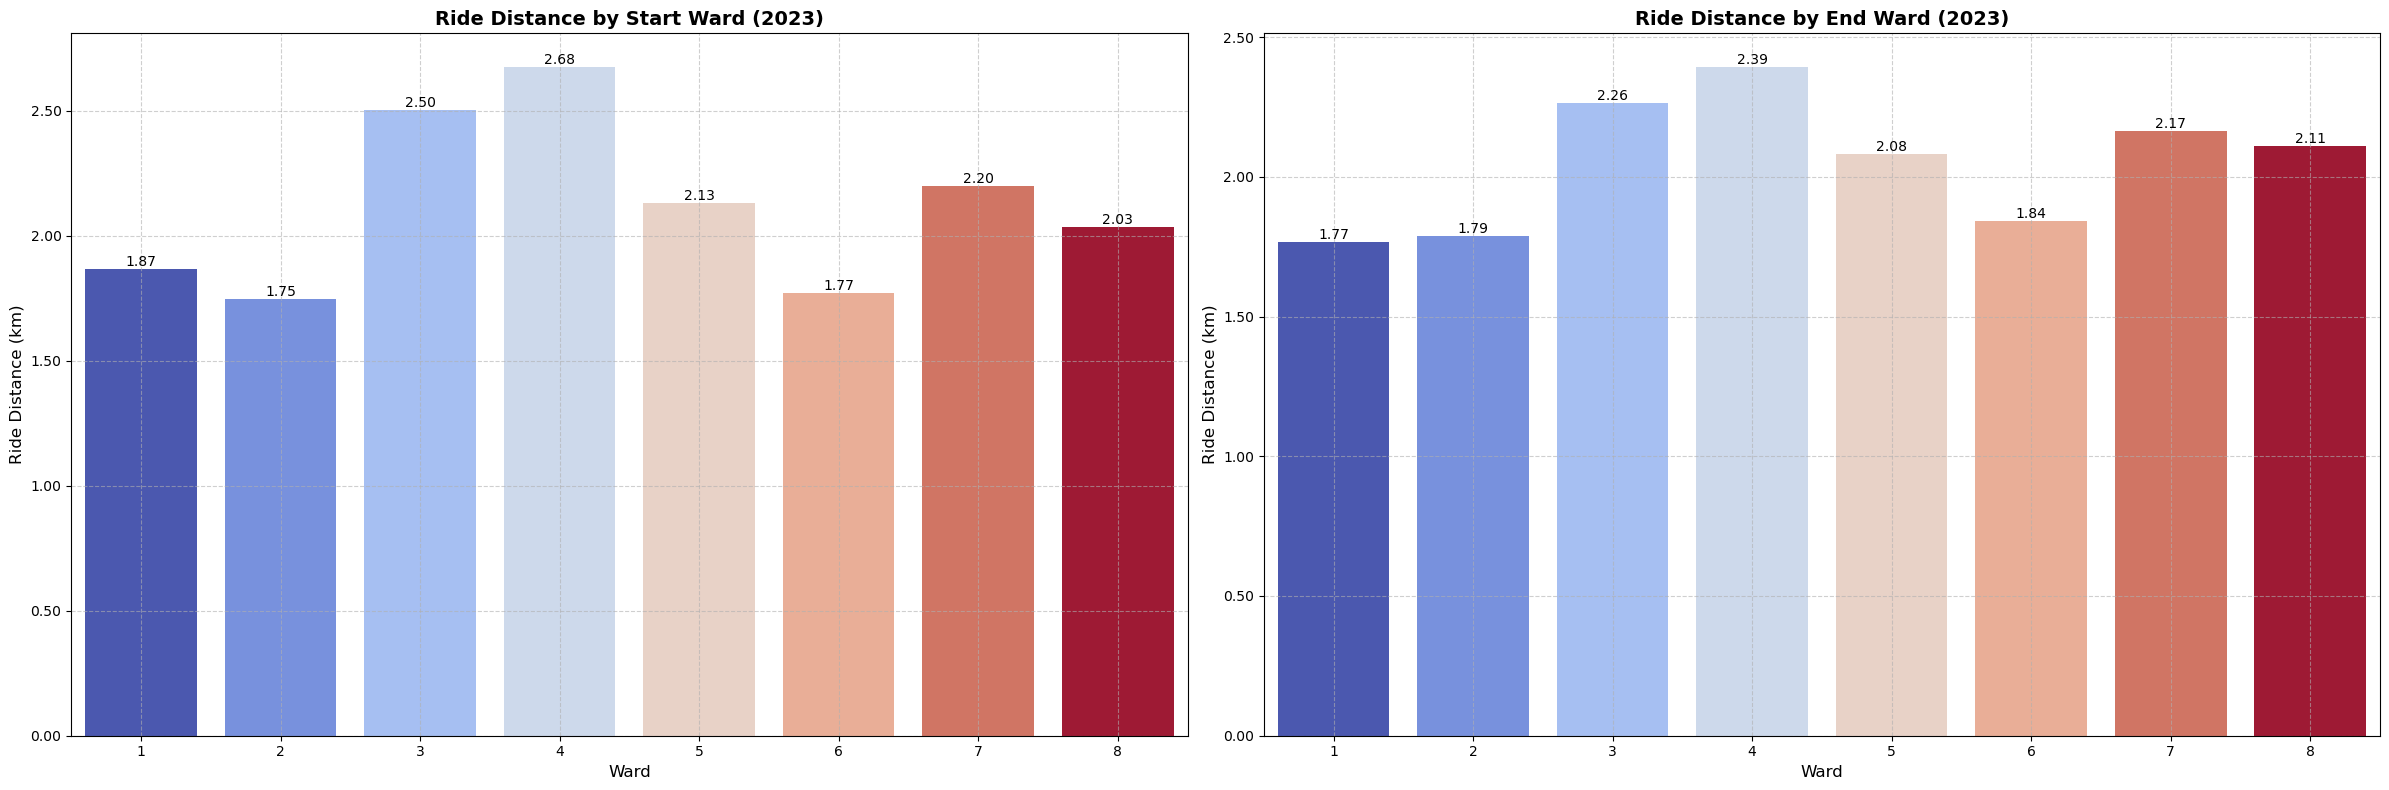

In [35]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Distance by Start Ward
sns.barplot(x="start_ward", 
            y="distance", 
            data=fdf_gdf,
            palette="coolwarm",
            hue="start_ward",  
            errorbar=None,
            ax=axs[0],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    if height > 0.01:
        axs[0].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Distance (km)", fontsize=12)
axs[0].set_title("Ride Distance by Start Ward (2023)", fontsize=14, fontweight="bold")

# Plot for Ride Distance by End Ward
sns.barplot(x="end_ward", 
            y="distance", 
            data=fdf_gdf,
            palette="coolwarm",
            hue="end_ward", 
            errorbar=None,
            ax=axs[1],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    if height > 0.01:
        axs[1].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Distance (km)", fontsize=12)
axs[1].set_title("Ride Distance by End Ward (2023)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [105]:
# Calculate the mean ride distance
mean_ride_distance = fdf_gdf["distance"].mean()

# Display the result
mean_ride_distance

1.856314435314784

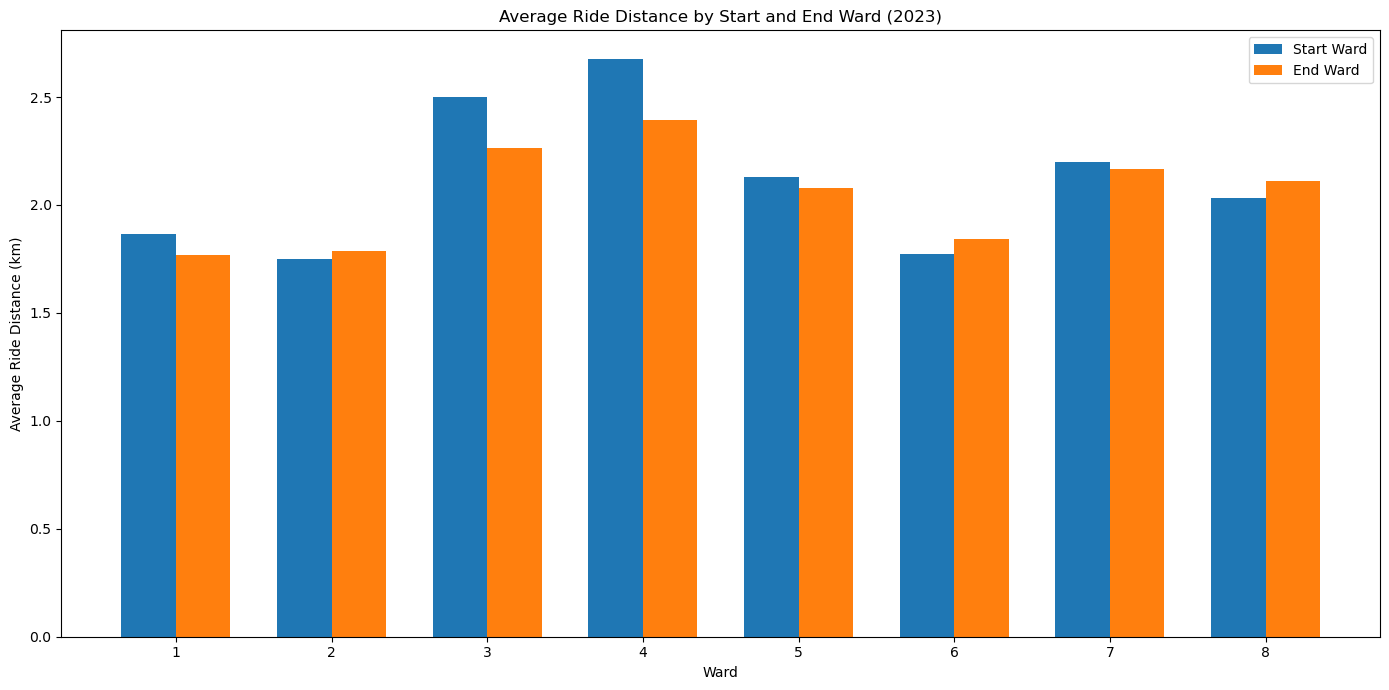

In [36]:
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare the data for plotting
start_ward_distances = fdf_gdf.groupby('start_ward')['distance'].mean().reset_index()
end_ward_distances = fdf_gdf.groupby('end_ward')['distance'].mean().reset_index()

# Merge the dataframes on ward
ward_distances = pd.merge(start_ward_distances, end_ward_distances, left_on='start_ward', right_on='end_ward', suffixes=('_start', '_end'))

# Plot the data
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(ward_distances))

# Bar plot for start ward distances
plt.bar(index, ward_distances['distance_start'], bar_width, label='Start Ward')

# Bar plot for end ward distances
plt.bar(index + bar_width, ward_distances['distance_end'], bar_width, label='End Ward')

# Add labels and title
plt.xlabel('Ward')
plt.ylabel('Average Ride Distance (km)')
plt.title('Average Ride Distance by Start and End Ward (2023)')
plt.xticks(index + bar_width / 2, ward_distances['start_ward'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
# Convert categorical columns to category type for memory efficiency
fdf_gdf["rideable_type"] = fdf_gdf["rideable_type"].astype("category")
fdf_gdf["start_station_name"] = fdf_gdf["start_station_name"].astype("category")
fdf_gdf["end_station_name"] = fdf_gdf["end_station_name"].astype("category")
fdf_gdf["member_casual"] = fdf_gdf["member_casual"].astype("category")
fdf_gdf["day_of_week"] = fdf_gdf["day_of_week"].astype("category")
fdf_gdf["holiday"] = fdf_gdf["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf_gdf['started_at'] = pd.to_datetime(fdf_gdf['started_at'])
fdf_gdf['ended_at'] = pd.to_datetime(fdf_gdf['ended_at'])


fdf_gdf['month'] = fdf_gdf['month'].astype('int8')
fdf_gdf["year"] = fdf_gdf["year"].astype("category")

fdf_gdf["ride_duration"] = pd.to_timedelta(fdf_gdf["ride_duration"])

### Ride Duration by Ward

In [38]:
# Convert ride_duration to minutes before filtering
fdf_gdf["ride_duration_min"] = fdf_gdf["ride_duration"].dt.total_seconds() / 60
fdf_gdf["ride_duration_min"] = fdf_gdf["ride_duration"].dt.total_seconds() / 60

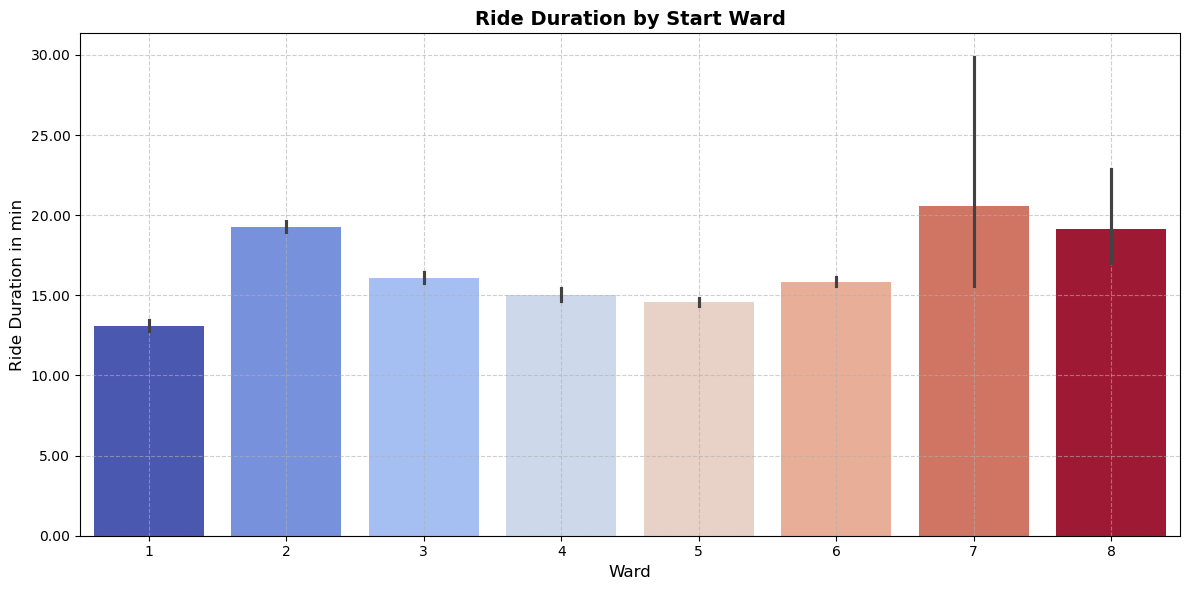

In [39]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create the bar plot 
sns.barplot(x="start_ward", 
            y="ride_duration_min", 
            data=fdf_gdf,
            hue="start_ward",
            palette="coolwarm",
            legend=False,
            )  

# Format y-axis to show two decimals
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Ward", fontsize=12)
plt.ylabel("Ride Duration in min", fontsize=12)
plt.title("Ride Duration by Start Ward", fontsize=14, fontweight="bold")


# Show the plot
plt.tight_layout()  # Ensures that everything fits without overlapping
plt.show()

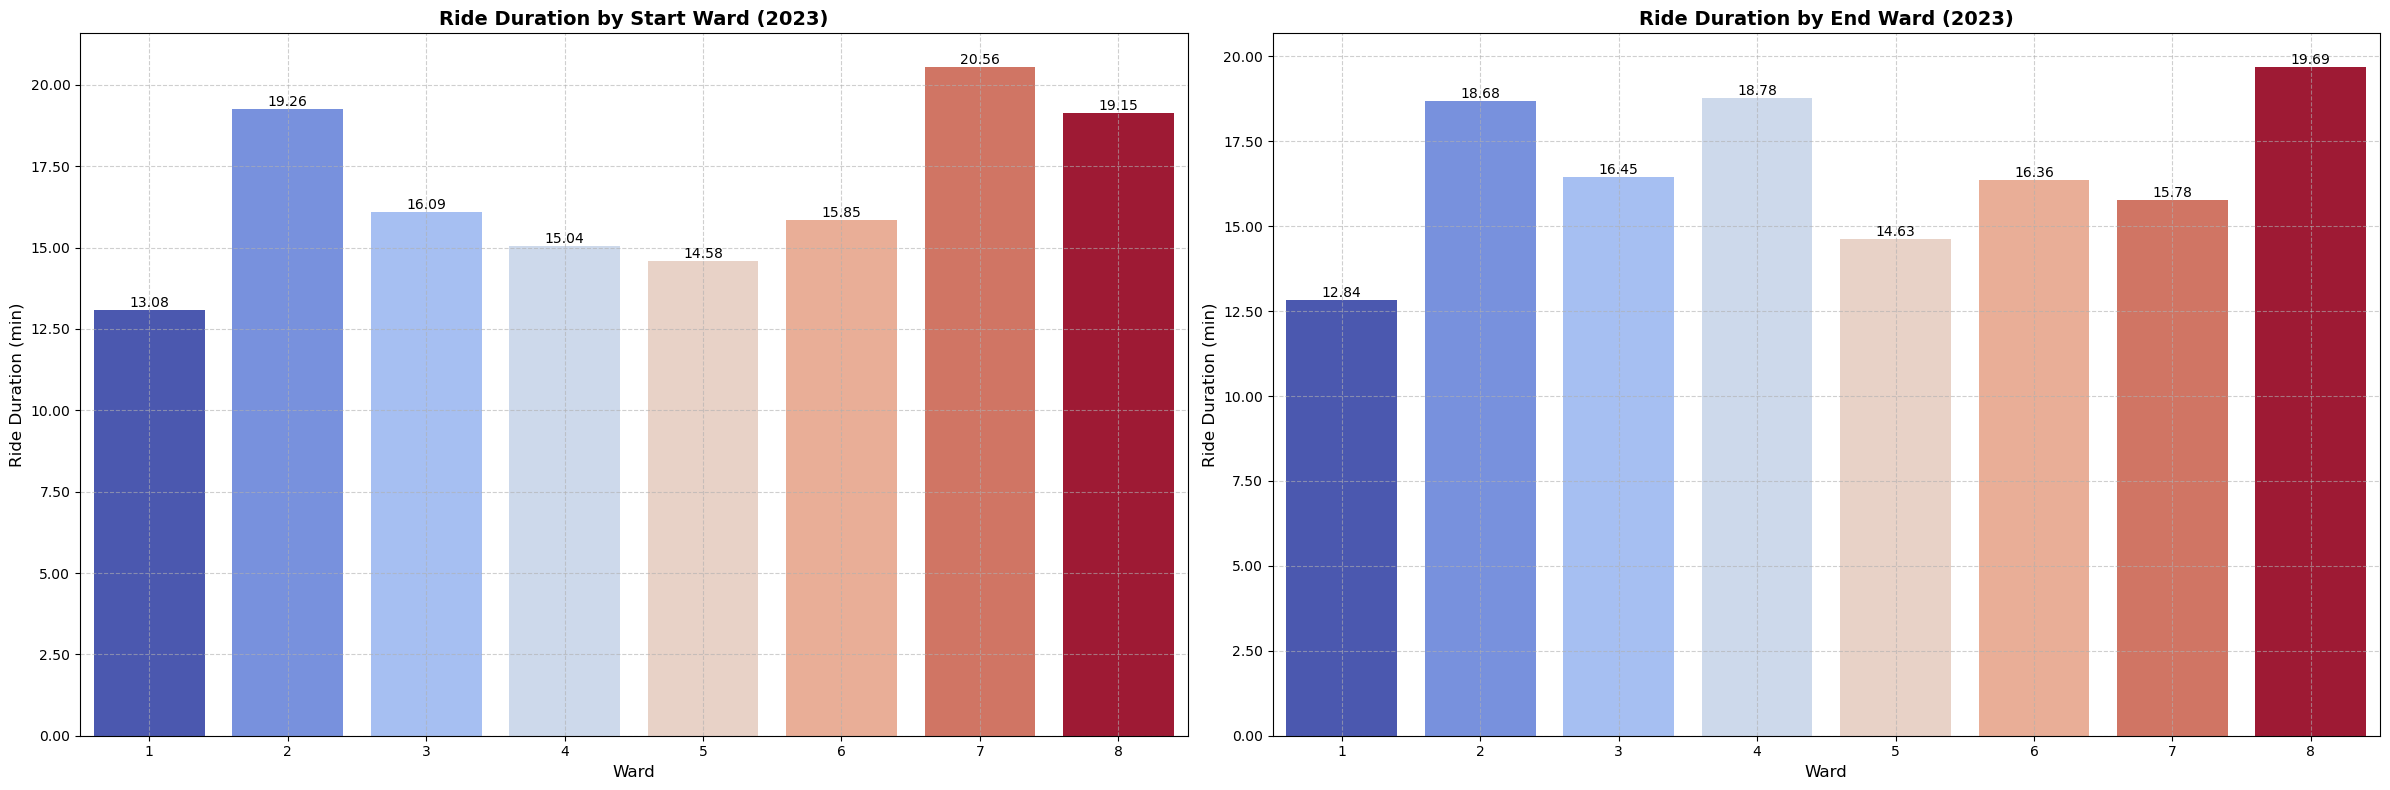

In [40]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Duration by Start Ward
sns.barplot(
    x="start_ward", 
    y="ride_duration_min", 
    data=fdf_gdf, 
    palette="coolwarm", 
    hue="start_ward", 
    errorbar=None, 
    ax=axs[0], 
    legend=False
)

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    if height > 0.01:
        axs[0].annotate(
            f'{height:.2f}', 
            (p.get_x() + p.get_width() / 2., height), 
            ha='center', 
            va='center', 
            fontsize=10, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Duration (min)", fontsize=12)
axs[0].set_title("Ride Duration by Start Ward (2023)", fontsize=14, fontweight="bold")

# Plot for Ride Duration by End Ward
sns.barplot(
    x="end_ward", 
    y="ride_duration_min", 
    data=fdf_gdf, 
    palette="coolwarm", 
    hue="end_ward", 
    errorbar=None, 
    ax=axs[1], 
    legend=False
)

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    if height > 0.01:
        axs[1].annotate(
            f'{height:.2f}', 
            (p.get_x() + p.get_width() / 2., height), 
            ha='center', 
            va='center', 
            fontsize=10, 
            color='black', 
            xytext=(0, 5), 
            textcoords='offset points'
        )

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Duration (min)", fontsize=12)
axs[1].set_title("Ride Duration by End Ward (2023)", fontsize=14, fontweight="bold")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [104]:
# Calculate the mean ride duration in minutes
mean_ride_duration = fdf_gdf["ride_duration_min"].mean()

# Display the result
mean_ride_duration

16.871457725785515

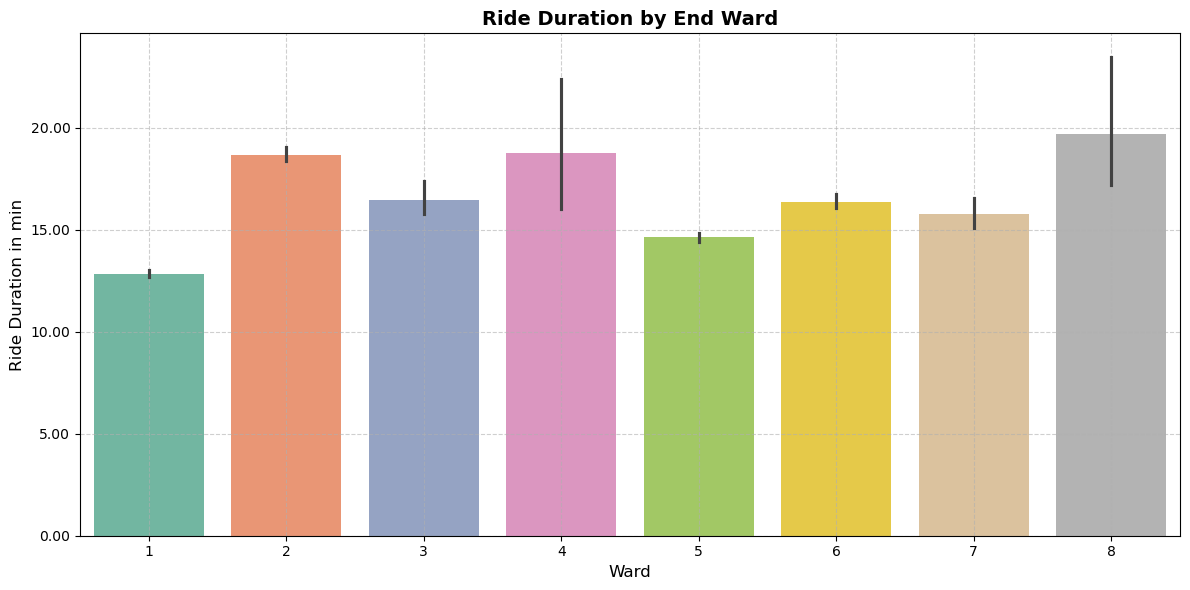

In [41]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create the bar plot 
sns.barplot(x="end_ward", 
            y="ride_duration_min", 
            data=fdf_gdf,
            hue="end_ward",
            palette="Set2",
            legend=False
            )  

# Format y-axis to show two decimals
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)  # Dashed grid lines with some transparency

# Improve labels and title
plt.xlabel("Ward", fontsize=12)
plt.ylabel("Ride Duration in min", fontsize=12)
plt.title("Ride Duration by End Ward", fontsize=14, fontweight="bold")


# Show the plot
plt.tight_layout()  # Ensures that everything fits without overlapping
plt.show()

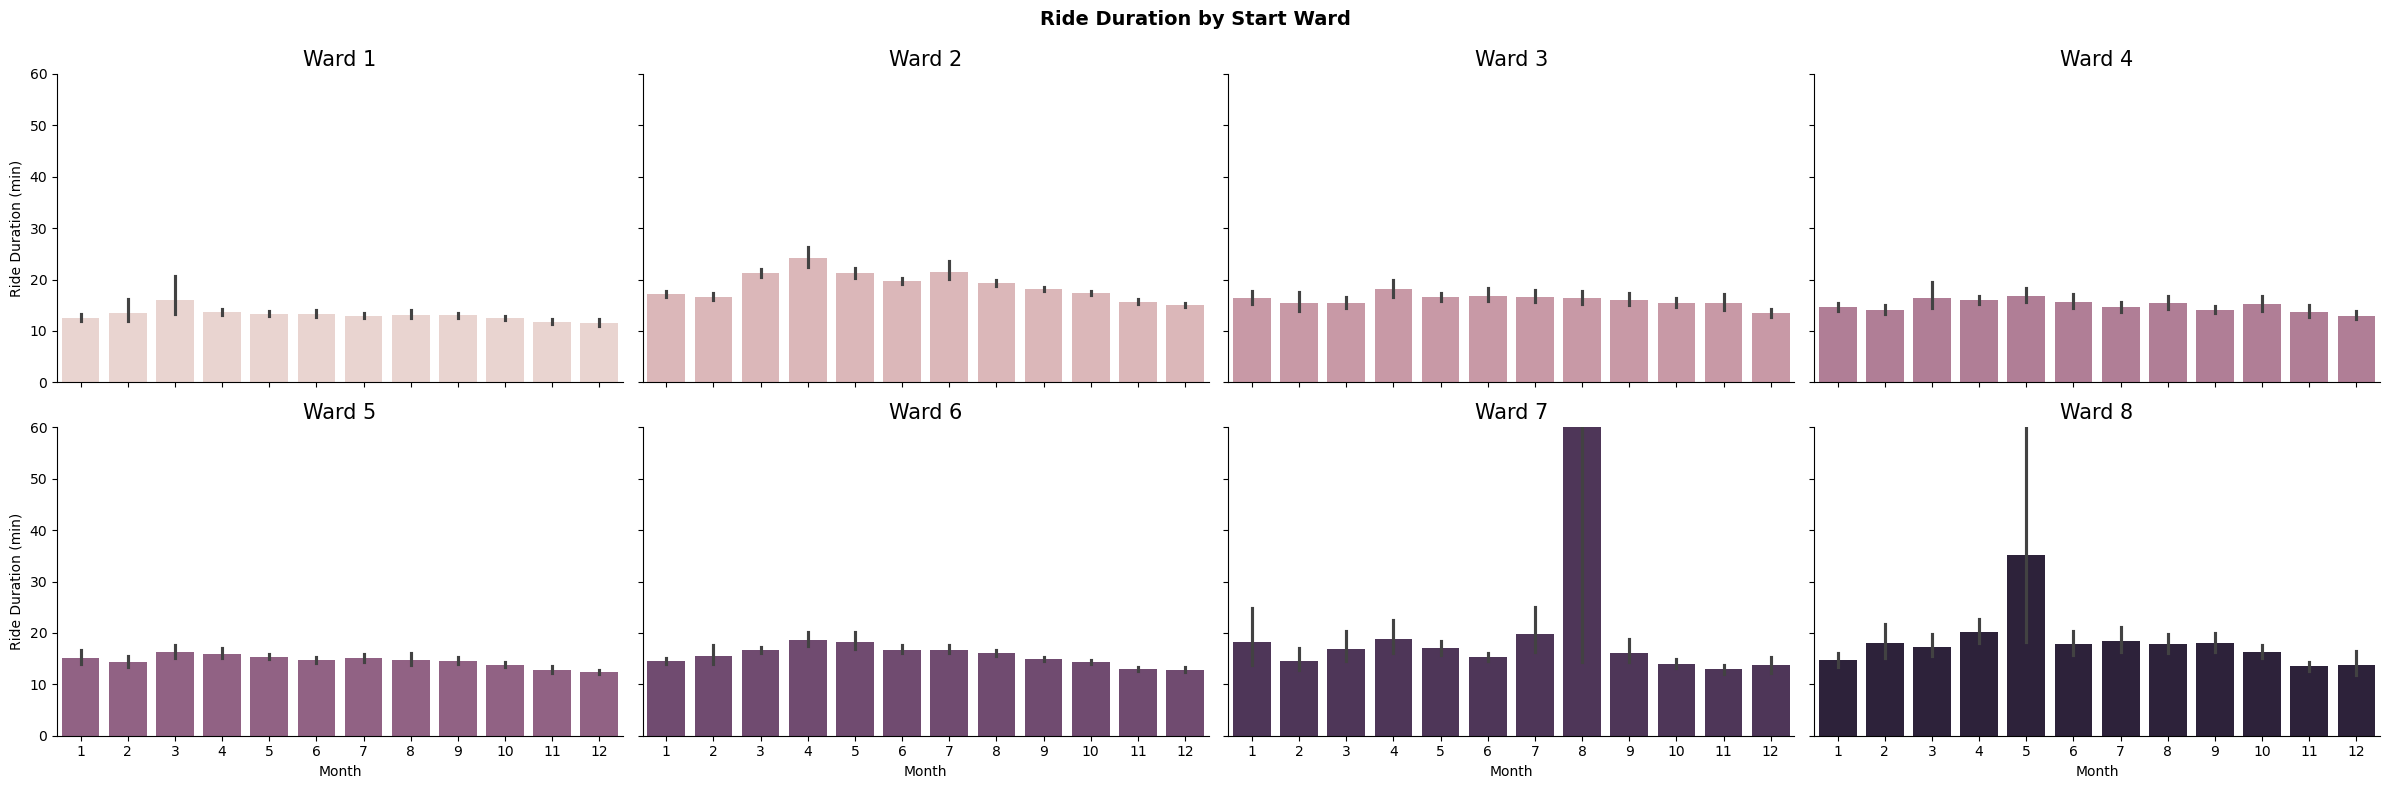

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="month", 
    y="ride_duration_min", 
    data=fdf_gdf, 
    hue="start_ward", 
    kind="bar", 
    col="start_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,
    legend=False  # Set aspect ratio for better visuals
)

# Adjust axes limits and titles
g.set_axis_labels("Month", "Ride Duration (min)")
g.set_titles("Ward {col_name}", size=15)  # Adjust title size for each subplot here

# Adjust the Y-axis for consistency
for ax in g.axes.flat:
    ax.set_ylim(0, 60)

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust the space between the title and the subplots

# Set the main title
g.fig.suptitle('Ride Duration by Start Ward', fontsize=14, fontweight="bold")

# Show the plot
plt.show()

In [43]:
# Filter rides that started in Ward 7 and occurred in August
august_ward_7_rides = fdf_gdf[(fdf_gdf['start_ward'] == 7) & (fdf_gdf['month'] == 8)]

# Display the filtered DataFrame
august_ward_7_rides.head()

# Count the total rows for august_ward_7_rides
total_rides = august_ward_7_rides.shape[0]
print(f"Total rides in Ward 7 during August: {total_rides}")

Total rides in Ward 7 during August: 1070


In [44]:
import matplotlib.pyplot as plt

# Convert 'started_at' to datetime if not already
august_ward_7_rides['started_at'] = pd.to_datetime(august_ward_7_rides['started_at'])

# Group by date and count the number of rides
rides_by_date = august_ward_7_rides.groupby(august_ward_7_rides['started_at'].dt.date).size()

# Plot the data
plt.figure(figsize=(12, 6))
rides_by_date.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('ride_duration_min', fontsize=12)
plt.title('ride_duration_mins from Ward 7 in August by Date', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\4012818213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_ward_7_rides['started_at'] = pd.to_datetime(august_ward_7_rides['started_at'])


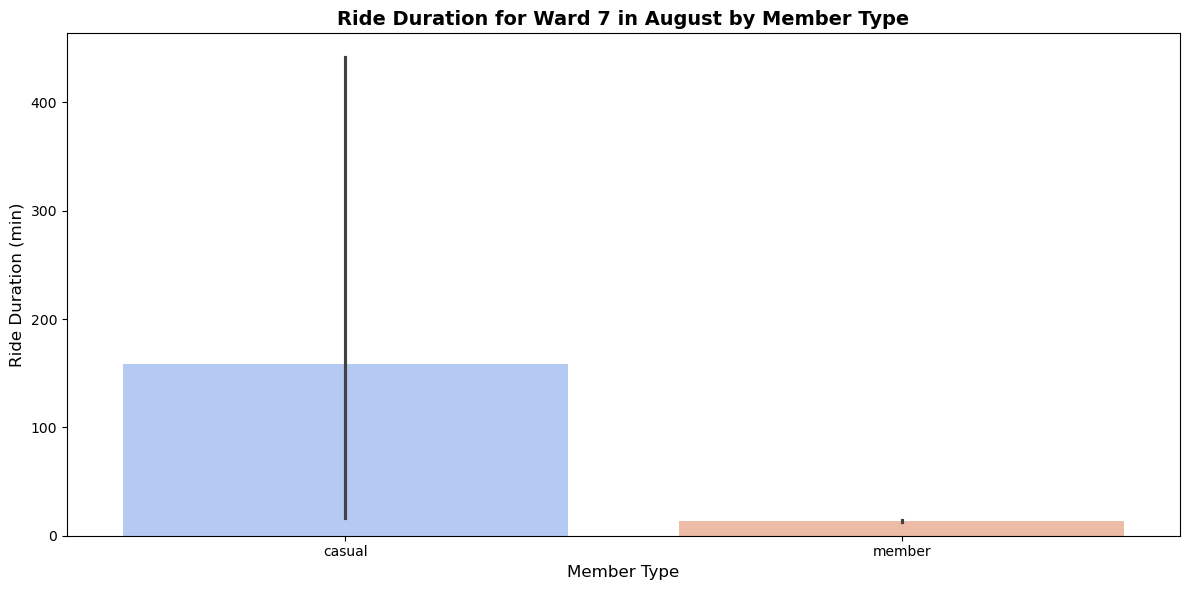

In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

# Filter rides that started in Ward 7 and occurred in August
august_ward_7_rides = fdf_gdf[(fdf_gdf['start_ward'] == 7) & (fdf_gdf['month'] == 8)]

# Plot the ride duration by member type
plt.figure(figsize=(12, 6))
sns.barplot(x='member_casual', y='ride_duration_min', data=august_ward_7_rides, hue='member_casual', palette='coolwarm')

# Add labels and title
plt.xlabel('Member Type', fontsize=12)
plt.ylabel('Ride Duration (min)', fontsize=12)
plt.title('Ride Duration for Ward 7 in August by Member Type', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

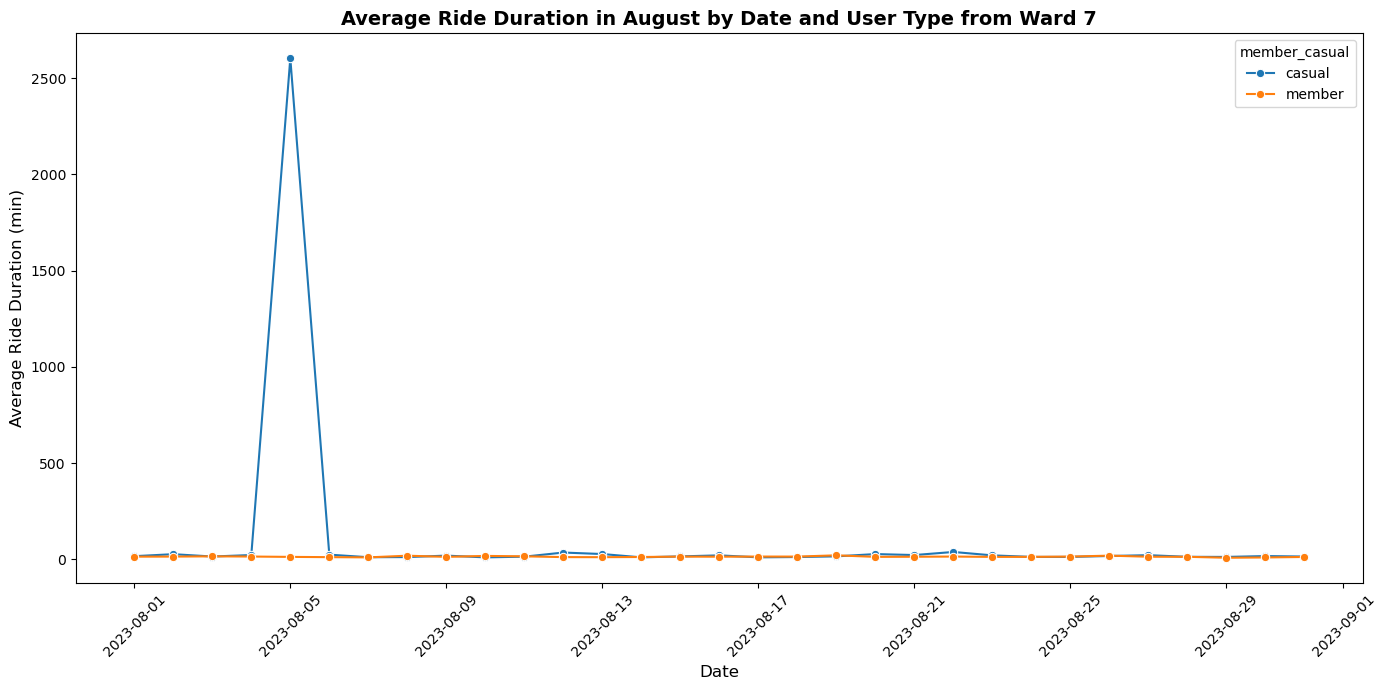

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter rides that started in Ward 7 and occurred in August
august_ward_7_rides = fdf_gdf[(fdf_gdf['start_ward'] == 7) & (fdf_gdf['month'] == 8)].copy()  # Avoid the SettingWithCopyWarning

# Convert 'started_at' to datetime if not already
august_ward_7_rides['started_at'] = pd.to_datetime(august_ward_7_rides['started_at'])

# Group by date and user type to get the average ride duration
# Explicitly set observed=False to avoid the FutureWarning
rides_by_date_user = august_ward_7_rides.groupby([august_ward_7_rides['started_at'].dt.date, 'member_casual'], observed=False)['ride_duration_min'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=rides_by_date_user, x='started_at', y='ride_duration_min', hue='member_casual', marker='o')

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Ride Duration (min)', fontsize=12)
plt.title('Average Ride Duration in August by Date and User Type from Ward 7', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
# Filter rides that started in Ward 7 on August 5
ward_7_august_5_rides = fdf_gdf[(fdf_gdf['start_ward'] == 7) & (fdf_gdf['started_at'].dt.date == pd.to_datetime('2023-08-05').date())]

# Display the filtered DataFrame
ward_7_august_5_rides.head()

ride_id  rideable_type          started_at            ended_at  \
40852   8710878   classic_bike 2023-08-05 09:31:12 2023-08-05 09:44:25   
96109   8713398   classic_bike 2023-08-05 11:51:07 2023-08-05 12:03:36   
112617  8721414  electric_bike 2023-08-05 18:05:33 2023-08-05 18:29:13   
125769  8711945  electric_bike 2023-08-05 10:40:12 2023-08-05 10:49:12   
137790  8710823  electric_bike 2023-08-05 09:25:27 2023-08-05 09:40:30   

                       start_station_name  start_station_id  \
40852    Kingman Island/The Fields at RFK           31716.0   
96109   Anacostia Roller Skating Pavilion           31720.0   
112617                     15th & F St NE           31632.0   
125769                     15th & F St NE           31632.0   
137790                Rosedale Rec Center           31658.0   

                                         end_station_name  end_station_id  \
40852                                      10th & H St NE         31672.0   
96109   Eastern Market Metro / Pennsylvania Ave & 8th ...         31613.0   
112617                                11th & Kenyon St NW         31102.0   
125769                          19th & East Capitol St SE         31601.0   
137790                                        Tanner Park         31533.0   

        start_lat  start_lng  ...  month  year  season  day_of_week  holiday  \
40852   38.895955 -76.967845  ...      8  2023  Summer     Saturday       No   
96109   38.878771 -76.970930  ...      8  2023  Summer     Saturday       No   
112617  38.897145 -76.983554  ...      8  2023  Summer     Saturday       No   
125769  38.897082 -76.983578  ...      8  2023  Summer     Saturday       No   
137790  38.897817 -76.979609  ...      8  2023  Summer     Saturday       No   

       is_weekend   ride_duration start_ward end_ward ride_duration_min  
40852         Yes 0 days 00:13:13          7        6         13.216667  
96109         Yes 0 days 00:12:29          7        6         12.483333  
112617        Yes 0 days 00:23:40          7        1         23.666667  
125769        Yes 0 days 00:09:00          7        7          9.000000  
137790        Yes 0 days 00:15:03          7        5         15.050000  

[5 rows x 24 columns]

### Check longer rides that lasted more than 5 days

In [48]:
import pandas as pd

# Ensure ride_duration is a Timedelta type
fdf_gdf['ride_duration'] = pd.to_timedelta(fdf_gdf['ride_duration'])

# Filter rides that lasted more than 5 days
long_rides = fdf_gdf[fdf_gdf['ride_duration'] > pd.Timedelta(days=5)]

# Display the filtered DataFrame
long_rides.head(50)


ride_id rideable_type          started_at            ended_at  \
37681    7049151   docked_bike 2023-04-10 13:37:02 2023-04-22 08:52:14   
102300   8187198   docked_bike 2023-07-01 14:05:40 2023-07-23 18:55:31   
115198   6936402   docked_bike 2023-04-01 17:09:07 2023-04-11 06:07:01   
271868   7462149   docked_bike 2023-05-11 20:06:44 2023-05-21 11:20:34   
352390   7120508   docked_bike 2023-04-15 11:20:00 2023-04-30 14:55:42   
456906   8635728   docked_bike 2023-07-31 10:50:08 2023-08-07 17:41:49   
498600   7688212   docked_bike 2023-05-27 12:49:11 2023-06-02 10:10:25   
595776   6608641   docked_bike 2023-02-24 17:55:54 2023-03-02 13:08:30   
645886   7137513   docked_bike 2023-04-16 12:36:31 2023-04-25 17:22:57   
684721   7415079   docked_bike 2023-05-08 16:50:16 2023-05-26 13:29:47   
730305   6775324   docked_bike 2023-03-18 10:24:16 2023-03-31 06:17:43   
742358   8719174   docked_bike 2023-08-05 16:16:29 2023-09-08 16:44:28   
838682   6456799   docked_bike 2023-02-05 15:37:25 2023-02-11 19:35:34   
1054875  7474674   docked_bike 2023-05-12 17:56:27 2023-05-17 23:33:26   
1084970  8353937   docked_bike 2023-07-12 17:48:41 2023-07-17 23:56:31   

                                       start_station_name  start_station_id  \
37681                                   21st St & G st NW           31328.0   
102300                             4th St & Madison Dr NW           31288.0   
115198   Ohio Dr & West Basin Dr SW / MLK & FDR Memorials           31240.0   
271868                         North Capitol St & F St NW           31624.0   
352390                          Jefferson Dr & 14th St SW           31247.0   
456906                      15th St & Pennsylvania Ave NW           31129.0   
498600               Washington & Independence Ave SW/HHS           31272.0   
595776                           20th St & Florida Ave NW           31110.0   
645886                              Maine Ave & 7th St SW           31609.0   
684721                         Valley Ave & Wheeler Rd SE           31824.0   
730305                       Georgia Ave & Fairmont St NW           31207.0   
742358                  Anacostia Roller Skating Pavilion           31720.0   
838682                   Constitution Ave & 2nd St NW/DOL           31271.0   
1054875                           Wisconsin Ave & O St NW           31312.0   
1084970                          New Jersey Ave & F St NW           31655.0   

                             end_station_name  end_station_id  start_lat  \
37681          New Hampshire Ave & Ward Pl NW         31212.0  38.898302   
102300                          8th & F St NE         31631.0  38.890496   
115198                         6035 Warehouse         32901.0  38.884120   
271868   Massachusetts Ave & Dupont Circle NW         31200.0  38.897446   
352390                         6035 Warehouse         32901.0  38.888553   
456906             North Capitol St & G Pl NE         31637.0  38.896465   
498600       Hains Point/Buckeye & Ohio Dr SW         31273.0  38.886978   
595776             14th & Rhode Island Ave NW         31203.0  38.915400   
645886                      Anacostia Library         31804.0  38.878694   
684721                Potomac Ave & 8th St SE         31635.0  38.836646   
730305                         17th & K St NW         31213.0  38.924785   
742358                         22nd & P ST NW         31285.0  38.878771   
838682          10th St & Constitution Ave NW         31219.0  38.892275   
1054875                         1st & M St NE         31603.0  38.908490   
1084970         22nd St & Constitution Ave NW         31292.0  38.897108   

         start_lng  ...  month  year  season  day_of_week  holiday is_weekend  \
37681   -77.046913  ...      4  2023  Spring       Monday       No         No   
102300  -77.017247  ...      7  2023  Summer     Saturday       No        Yes   
115198  -77.046570  ...      4  2023  Spring     Saturday       No        Yes   
271868  -77.009888

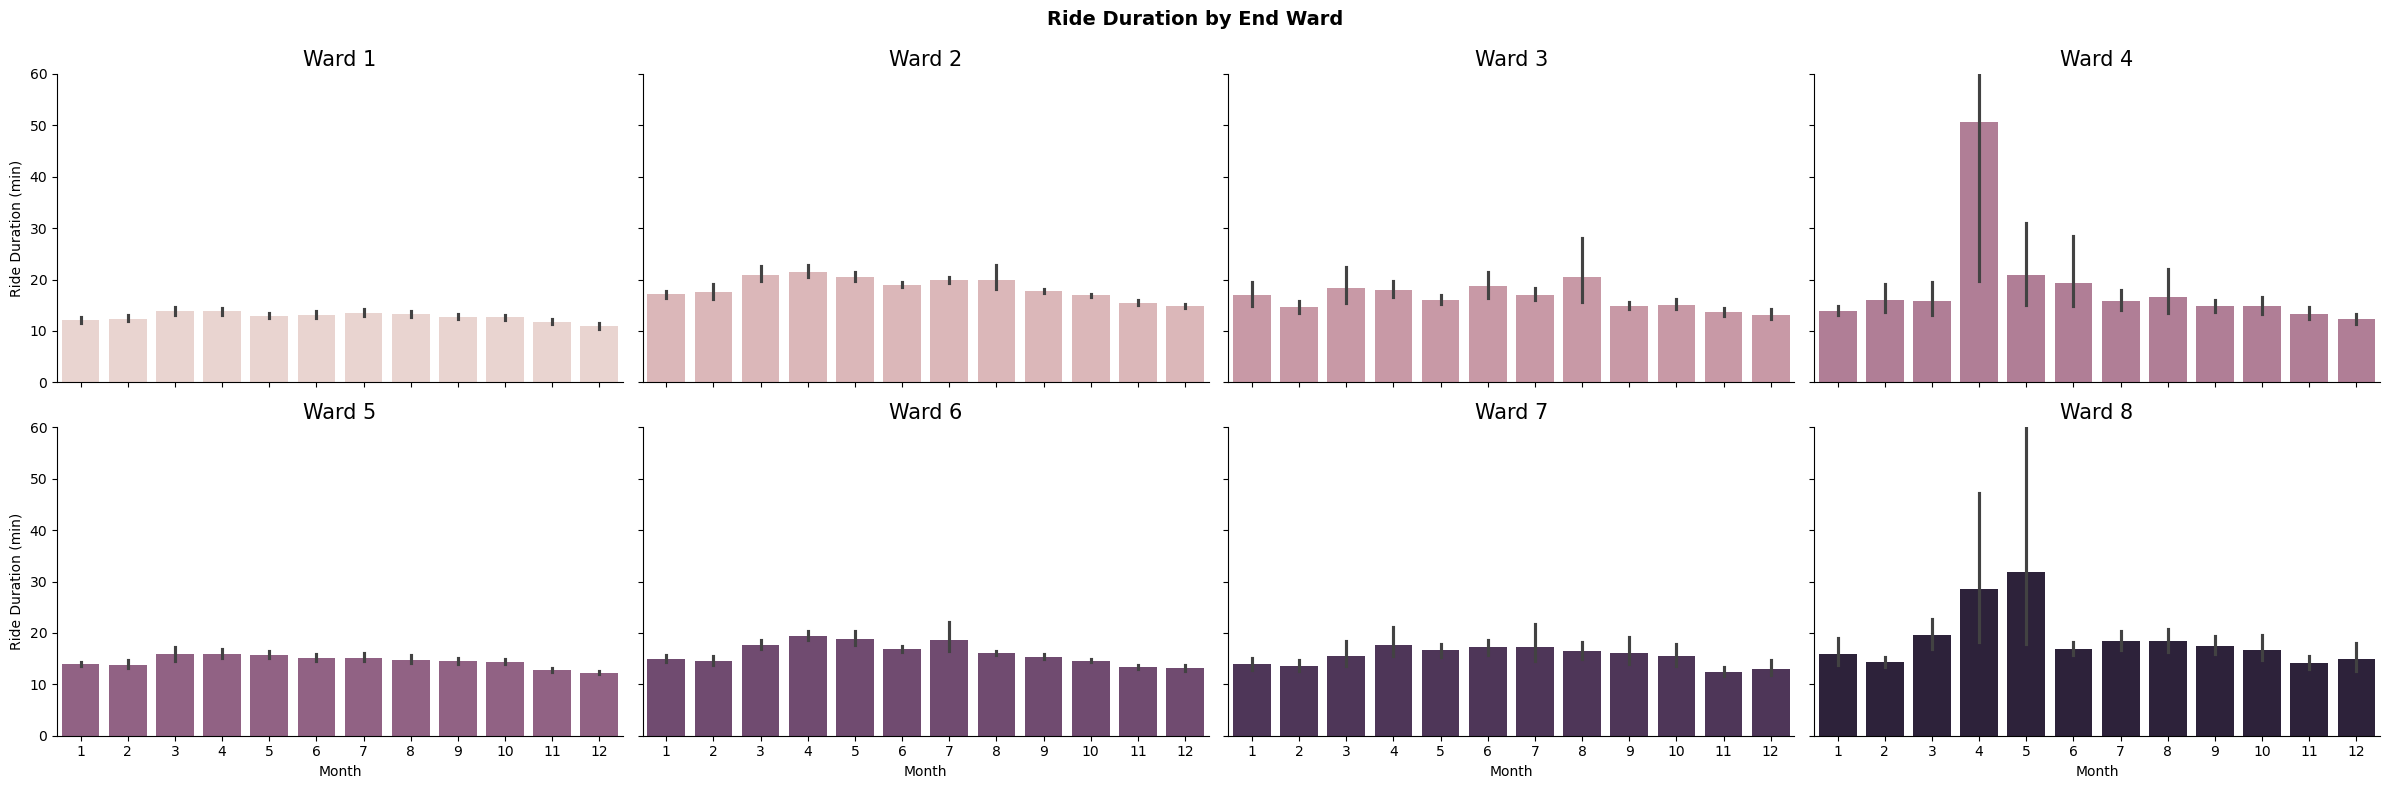

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="month", 
    y="ride_duration_min", 
    data=fdf_gdf, 
    hue="end_ward", 
    kind="bar", 
    col="end_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,
    legend=False  # Set aspect ratio for better visuals
)

# Adjust axes limits and titles
g.set_axis_labels("Month", "Ride Duration (min)")
g.set_titles("Ward {col_name}", size=15)  # Adjust title size for each subplot here

# Adjust the Y-axis for consistency
for ax in g.axes.flat:
    ax.set_ylim(0, 60)

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust the space between the title and the subplots

# Set the main title
g.fig.suptitle('Ride Duration by End Ward', fontsize=14, fontweight="bold")

# Show the plot
plt.show()


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="month", 
    y="ride_duration_min", 
    data=fdf_gdf, 
    hue="member_casual", 
    kind="bar", 
    col="start_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,
)

# Adjust axes limits and titles
g.set_axis_labels("Month", "Ride Duration (min)")
g.set_titles("Ward {col_name}", size=15)  # Adjust title size for each subplot here

# Adjust the Y-axis for consistency
for ax in g.axes.flat:
    ax.set_ylim(0, 60)

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust the space between the title and the subplots

# Set the main title
g.fig.suptitle('Ride Duration by Start Ward', fontsize=14, fontweight="bold")

# Show the plot
plt.show()

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="month", 
    y="ride_duration_min", 
    data=fdf_gdf, 
    hue="member_casual", 
    kind="bar", 
    col="end_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,
)

# Adjust axes limits and titles
g.set_axis_labels("Month", "Ride Duration (min)")
g.set_titles("Ward {col_name}", size=15)  # Adjust title size for each subplot here

# Adjust the Y-axis for consistency
for ax in g.axes.flat:
    ax.set_ylim(0, 60)

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust the space between the title and the subplots

# Set the main title
g.fig.suptitle('Ride Duration by End Ward', fontsize=14, fontweight="bold")

# Show the plot
plt.show()

### Ride Counts by Ward

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

# Group by month, start_ward, and member_casual to get the count of rides
start_ward_monthly_counts = fdf_gdf.groupby(['month', 'start_ward', 'member_casual']).size().reset_index(name='count')

# Create the seaborn FacetGrid with barplots for start_ward
g_start = sns.catplot(
    x="month", 
    y="count", 
    data=start_ward_monthly_counts, 
    hue="member_casual", 
    kind="bar", 
    col="start_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,
)

# Adjust axes limits and titles
g_start.set_axis_labels("Month", "Ride Count")
g_start.set_titles("Start Ward {col_name}", size=15)  # Adjust title size for each subplot here

# Adjust spacing
g_start.fig.tight_layout()
g_start.fig.subplots_adjust(top=0.9)  # Adjust the space between the title and the subplots

# Set the main title
g_start.fig.suptitle('Total Ride Count by Start Ward and User Type on a Monthly Basis', fontsize=14, fontweight="bold")

# Show the plot
plt.show()

# Group by month, end_ward, and member_casual to get the count of rides
end_ward_monthly_counts = fdf_gdf.groupby(['month', 'end_ward', 'member_casual']).size().reset_index(name='count')

# Create the seaborn FacetGrid with barplots for end_ward
g_end = sns.catplot(
    x="month", 
    y="count", 
    data=end_ward_monthly_counts, 
    hue="member_casual", 
    kind="bar", 
    col="end_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,
)

# Adjust axes limits and titles
g_end.set_axis_labels("Month", "Ride Count")
g_end.set_titles("End Ward {col_name}", size=15)  # Adjust title size for each subplot here

# Adjust spacing
g_end.fig.tight_layout()
g_end.fig.subplots_adjust(top=0.9)  # Adjust the space between the title and the subplots

# Set the main title
g_end.fig.suptitle('Total Ride Count by End Ward and User Type on a Monthly Basis', fontsize=14, fontweight="bold")

# Show the plot
plt.show()

C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\4231908851.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  start_ward_monthly_counts = fdf_gdf.groupby(['month', 'start_ward', 'member_casual']).size().reset_index(name='count')


C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\4231908851.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  end_ward_monthly_counts = fdf_gdf.groupby(['month', 'end_ward', 'member_casual']).size().reset_index(name='count')


In [53]:
# Count the number of rides per start_ward and sort by descending order
start_ward_counts = fdf_gdf.groupby("start_ward").size().reset_index(name="ride_count").sort_values(by="ride_count", ascending=False)

# Count the number of rides per end_ward and sort by descending order
end_ward_counts = fdf_gdf.groupby("end_ward").size().reset_index(name="ride_count").sort_values(by="ride_count", ascending=False)



### Ride Count

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom palette with different colors for each member type
palette = {"member": "blue", "casual": "orange"}

# Merge start_ward_counts and end_ward_counts with fdf_gdf to include member_casual
start_ward_counts = fdf_gdf.groupby(['start_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')
end_ward_counts = fdf_gdf.groupby(['end_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')

# Set the size of the plots
plt.figure(figsize=(12, 6))

# Plot the rides per start ward
plt.subplot(1, 2, 1)
sns.barplot(data=start_ward_counts, x="start_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per Start Ward')
plt.xlabel('Start Ward')
plt.ylabel('Ride Count')

# Plot the rides per end ward
plt.subplot(1, 2, 2)
sns.barplot(data=end_ward_counts, x="end_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per End Ward')
plt.xlabel('End Ward')
plt.ylabel('Ride Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


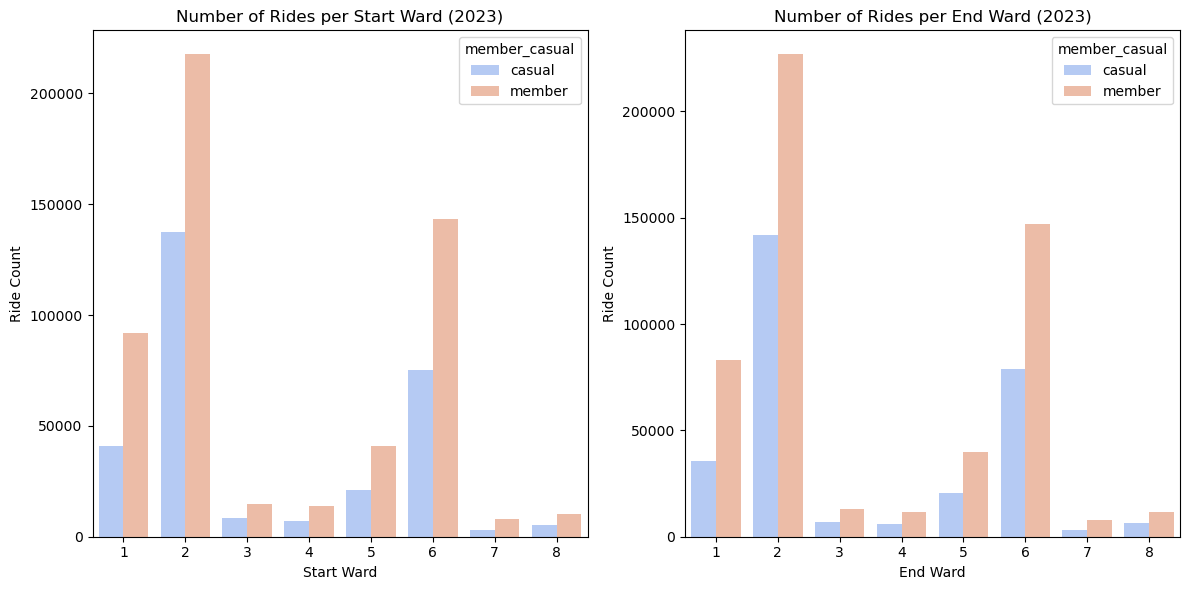

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the color palette to match the first plot
palette = sns.color_palette("coolwarm", n_colors=2)  # 2 colors to match member types

# Merge start_ward_counts and end_ward_counts with fdf_gdf to include member_casual
start_ward_counts = fdf_gdf.groupby(['start_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')
end_ward_counts = fdf_gdf.groupby(['end_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')

# Set the size of the plots
plt.figure(figsize=(12, 6))

# Plot the rides per start ward
plt.subplot(1, 2, 1)
sns.barplot(data=start_ward_counts, x="start_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per Start Ward (2023)')
plt.xlabel('Start Ward')
plt.ylabel('Ride Count')

# Plot the rides per end ward
plt.subplot(1, 2, 2)
sns.barplot(data=end_ward_counts, x="end_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per End Ward (2023)')
plt.xlabel('End Ward')
plt.ylabel('Ride Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Mean rides per day and per Ward

In [56]:
# Ensure 'started_at' is in datetime format
fdf_gdf['started_at'] = pd.to_datetime(fdf_gdf['started_at'])

# Group by start_ward and date, then count the number of rides per day
rides_per_day = fdf_gdf.groupby([fdf_gdf['started_at'].dt.date, 'start_ward']).size().reset_index(name='ride_count')

# Calculate the mean number of rides per day for each ward
mean_rides_per_day = rides_per_day.groupby('start_ward')['ride_count'].mean().reset_index(name='mean_rides_per_day')

# Display the result
print(mean_rides_per_day)

   start_ward  mean_rides_per_day
0           1          364.339726
1           2          972.994521
2           3           63.419178
3           4           57.090411
4           5          170.336986
5           6          599.183562
6           7           30.326027
7           8           43.084932


### Share of Rides

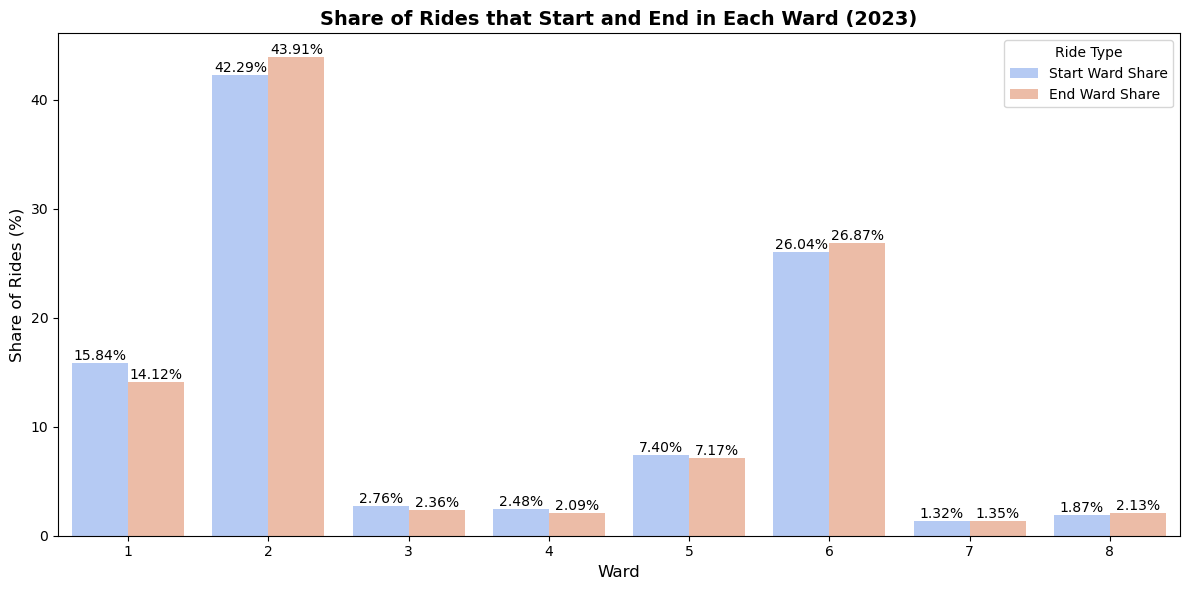

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the share of rides that start in each ward
start_ward_share = fdf_gdf['start_ward'].value_counts(normalize=True).sort_index() * 100

# Calculate the share of rides that end in each ward
end_ward_share = fdf_gdf['end_ward'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame for easier plotting
ward_share_df = pd.DataFrame({
    'Start Ward Share': start_ward_share,
    'End Ward Share': end_ward_share
}).reset_index().rename(columns={'index': 'Ward'})

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Ward', 
    y='value', 
    hue='variable', 
    data=pd.melt(ward_share_df, id_vars=['Ward'], value_vars=['Start Ward Share', 'End Ward Share']), 
    palette='coolwarm'
)

# Add labels on top of each bar, but only if the height is greater than 0
for p in ax.patches:
    height = p.get_height()
    if height > 0.01:  # Avoid showing labels for bars with nearly 0%
        ax.annotate(f'{height:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # Offset the text above the bar
                    textcoords='offset points')

plt.xlabel('Ward', fontsize=12)
plt.ylabel('Share of Rides (%)', fontsize=12)
plt.title('Share of Rides that Start and End in Each Ward (2023)', fontsize=14, fontweight='bold')
plt.legend(title='Ride Type')

# Show the plot
plt.tight_layout()
plt.show()


### User Distribution by Ward

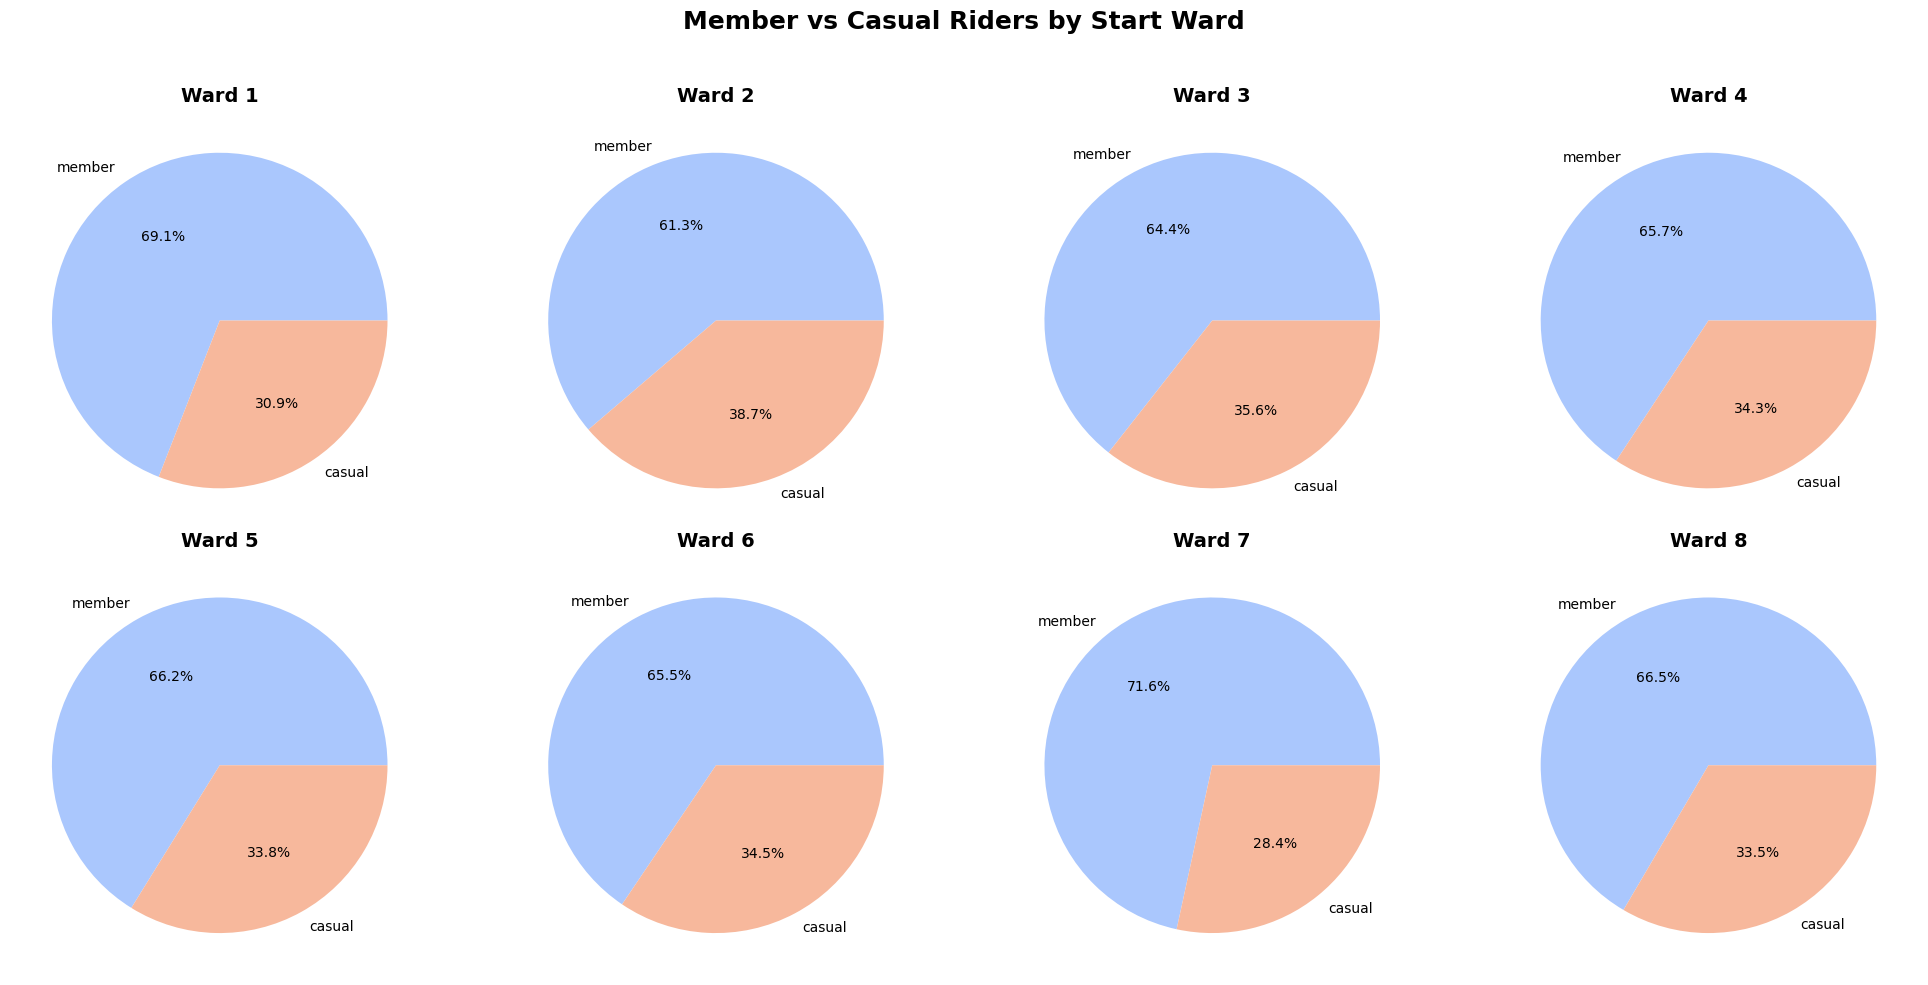

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure wards are sorted numerically
wards = sorted(fdf_gdf['start_ward'].unique(), key=lambda x: int(x))  

# Create subplots (2 rows, 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, ward in enumerate(wards):
    ax = axs[i // 4, i % 4]  # Correctly position each subplot
    ward_data = fdf_gdf[fdf_gdf['start_ward'] == ward]['member_casual'].value_counts()
    
    ax.pie(ward_data, labels=ward_data.index, autopct='%1.1f%%', 
        colors=sns.color_palette('coolwarm', len(ward_data)))
    
    ax.set_title(f'Ward {ward}', fontsize=14, fontweight='bold')

# Add a main title
fig.suptitle('Member vs Casual Riders by Start Ward', fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title

# Show the plot
plt.show()


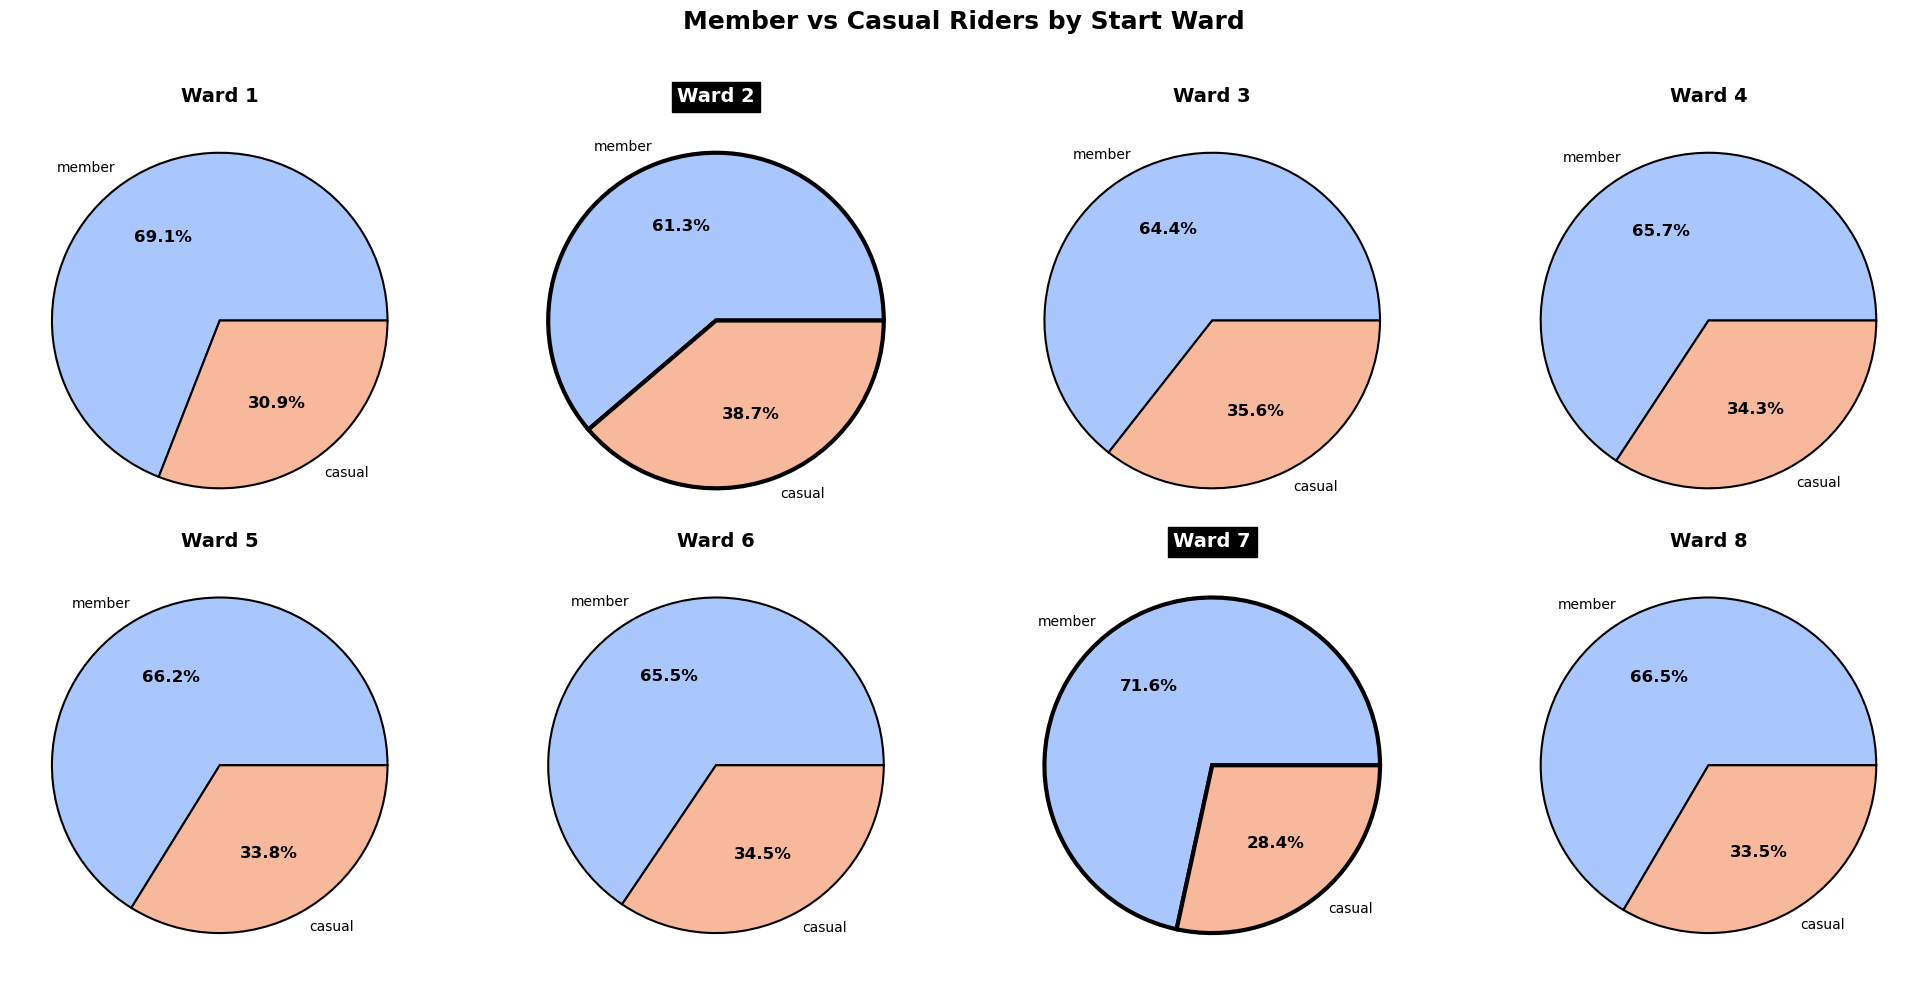

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure wards are sorted numerically
wards = sorted(fdf_gdf['start_ward'].unique(), key=lambda x: int(x))  

# Define highlight wards and their background colors
highlight_wards = {2, 7}  
highlight_colors = {2: "#ffcccc", 7: "#cce5ff"}  # Light red for Ward 2, Light blue for Ward 7

# Create subplots (2 rows, 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, ward in enumerate(wards):
    ax = axs[i // 4, i % 4]  # Correctly position each subplot
    ward_data = fdf_gdf[fdf_gdf['start_ward'] == ward]['member_casual'].value_counts()
    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        ward_data, labels=ward_data.index, autopct='%1.1f%%',
        colors=sns.color_palette('coolwarm', len(ward_data)),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}  # Standard border
    )

     # Make the percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")  # Set font to bold
        autotext.set_fontsize(12)  # Optional: Adjust font size
    
    # Highlight Ward 2 and Ward 7 with a stronger background color
    if ward in highlight_wards:
        ax.set_facecolor(highlight_colors[ward])  # Stronger color (light red or light blue)
        for wedge in wedges:
            wedge.set_linewidth(3)  # Even thicker border
            wedge.set_edgecolor('black')
        ax.set_title(f'Ward {ward}', fontsize=14, fontweight='bold', color='white', backgroundcolor='black')  
    else:
        ax.set_title(f'Ward {ward}', fontsize=14, fontweight='bold')

# Add a main title
fig.suptitle('Member vs Casual Riders by Start Ward', fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title

# Show the plot
plt.show()


In [60]:
# Calculate the distribution of member and casual users
user_distribution = fdf_gdf['member_casual'].value_counts(normalize=True) * 100

# Display the distribution
print(user_distribution)

member_casual
member    64.409258
casual    35.590742
Name: proportion, dtype: float64


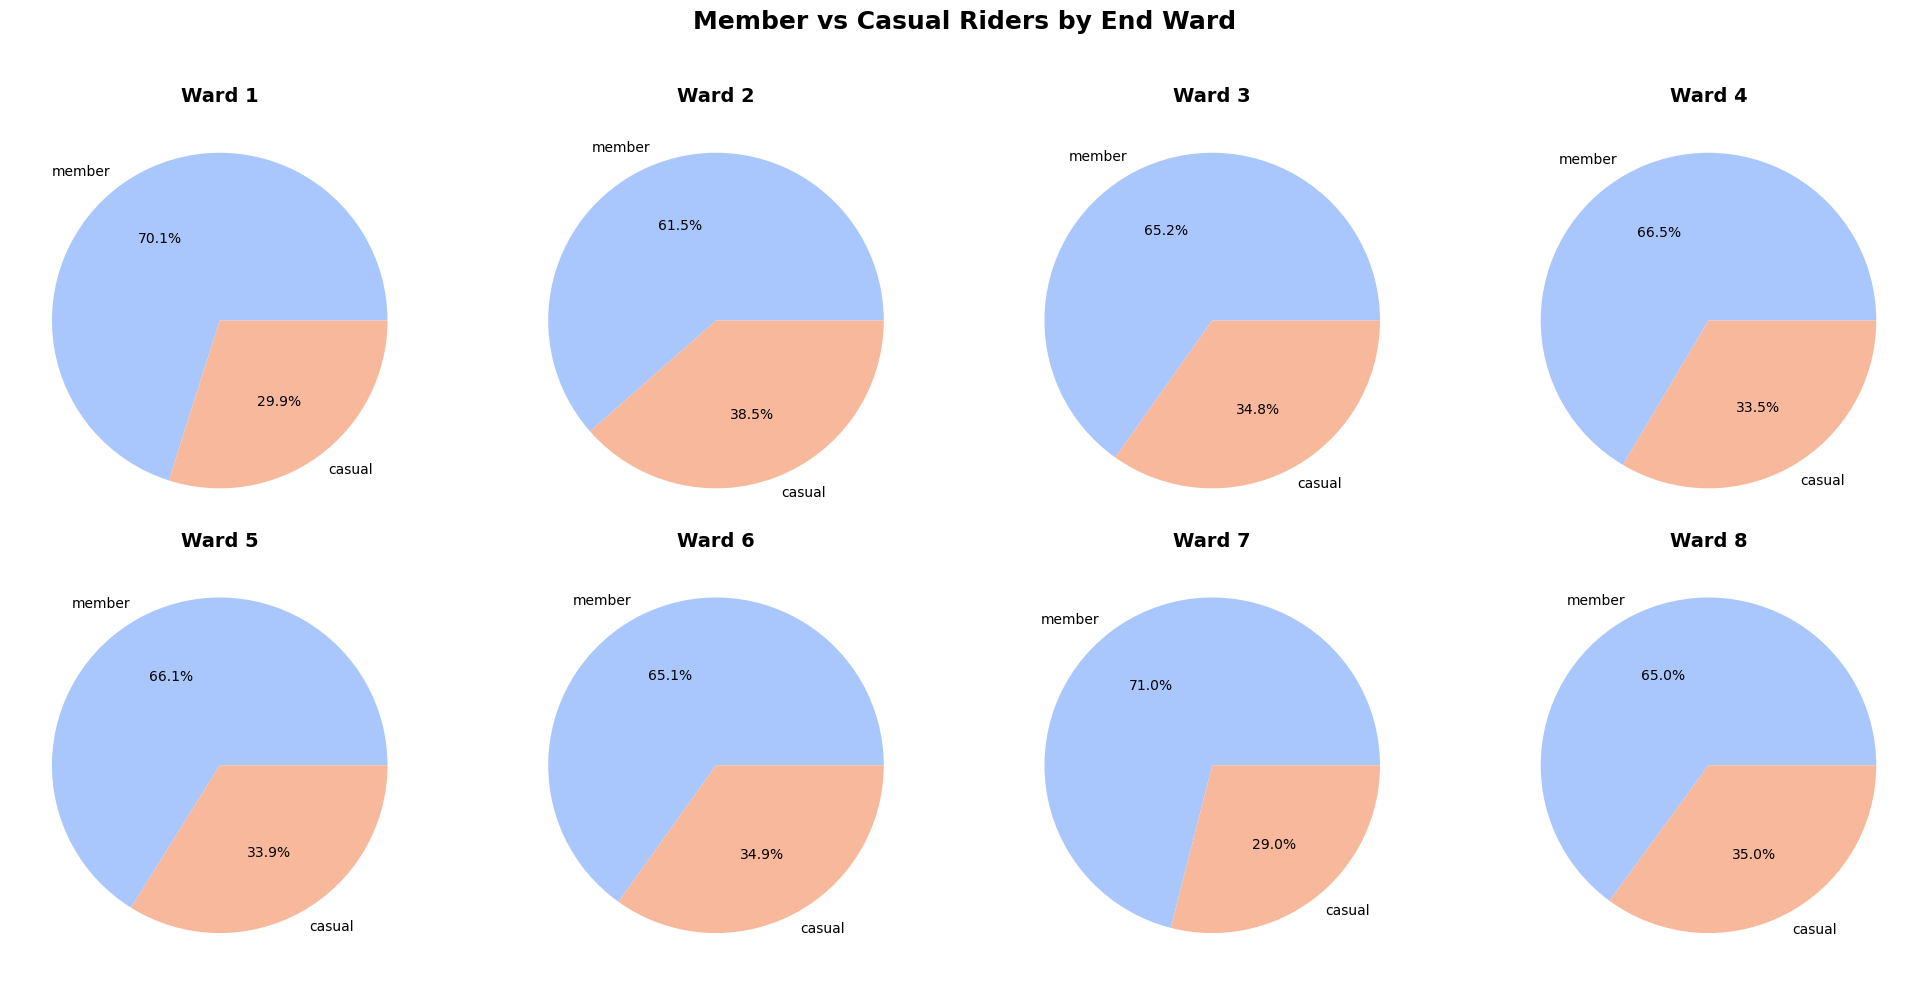

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure wards are sorted numerically
wards = sorted(fdf_gdf['end_ward'].unique(), key=lambda x: int(x))  

# Create subplots (2 rows, 4 columns)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, ward in enumerate(wards):
    ax = axs[i // 4, i % 4]  # Correctly position each subplot
    ward_data = fdf_gdf[fdf_gdf['end_ward'] == ward]['member_casual'].value_counts()
    
    ax.pie(ward_data, labels=ward_data.index, autopct='%1.1f%%', 
        colors=sns.color_palette('coolwarm', len(ward_data)))
    
    ax.set_title(f'Ward {ward}', fontsize=14, fontweight='bold')

# Add a main title
fig.suptitle('Member vs Casual Riders by End Ward', fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title

# Show the plot
plt.show()

### Cross Riding Between Wards

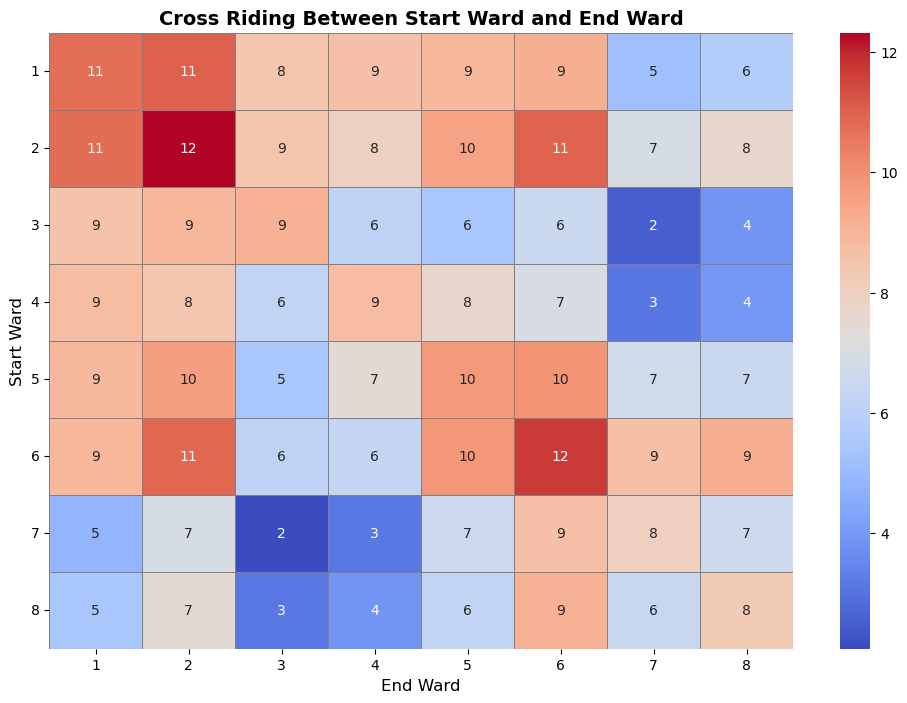

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a pivot table to count the rides between start_ward and end_ward
cross_riding = fdf_gdf.pivot_table(index='start_ward', columns='end_ward', values='ride_id', aggfunc='count', fill_value=0)

# Apply log scale transformation if necessary (optional)
cross_riding_log = np.log1p(cross_riding)  # log(1 + x) to avoid log(0) issues

plt.figure(figsize=(12, 8))

# Create heatmap with formatting improvements
ax = sns.heatmap(cross_riding_log, 
                 annot=True, 
                 fmt=".0f",  # Use integer format (rounded)
                 cmap="coolwarm",  # Better contrast
                 cbar=True, 
                 linewidths=0.5,  # Add thin grid lines
                 linecolor="gray")

# Improve readability
plt.title('Cross Riding Between Start Ward and End Ward', fontsize=14, fontweight="bold")
plt.xlabel('End Ward', fontsize=12)
plt.ylabel('Start Ward', fontsize=12)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


In [63]:
import plotly.graph_objects as go
import pandas as pd

# Aggregate ride counts
flow_data = fdf_gdf.groupby(['start_ward', 'end_ward']).size().reset_index(name='count')

# Convert ward names to indices for Sankey diagram
ward_labels = list(set(flow_data['start_ward']).union(set(flow_data['end_ward'])))
ward_indices = {ward: i for i, ward in enumerate(ward_labels)}

# Map wards to indices
flow_data['start_idx'] = flow_data['start_ward'].map(ward_indices)
flow_data['end_idx'] = flow_data['end_ward'].map(ward_indices)

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=ward_labels
    ),
    link=dict(
        source=flow_data['start_idx'],  
        target=flow_data['end_idx'],  
        value=flow_data['count']
    )
))

fig.update_layout(title_text="Movement Between Wards", font_size=10)
fig.show()


In [64]:
import folium
import pandas as pd
import geopandas as gpd
from folium.plugins import AntPath

# Load the GeoJSON file with ward boundaries
wards_gdf = gpd.read_file("wards_from_2022.geojson")

# Aggregate ride counts between wards
flow_data = fdf_gdf.groupby(['start_ward', 'end_ward']).size().reset_index(name='count')

# Extract ward centroids for better positioning
wards_gdf = wards_gdf.to_crs(epsg=3857)  # Convert to Web Mercator (good for visualization)
wards_gdf["centroid"] = wards_gdf.geometry.centroid
wards_gdf = wards_gdf.to_crs(epsg=4326)  # Convert back to latitude/longitude
ward_coords = wards_gdf.set_index("WARD")["centroid"].apply(lambda point: (point.y, point.x))

# Merge coordinates into flow data
flow_data = flow_data.merge(ward_coords.rename("start_coords"), left_on="start_ward", right_index=True)
flow_data = flow_data.merge(ward_coords.rename("end_coords"), left_on="end_ward", right_index=True)

# Normalize ride counts for color coding
max_rides = flow_data["count"].max()
flow_data["color"] = flow_data["count"].apply(lambda x: "red" if x > 0.7 * max_rides else "yellow" if x > 0.3 * max_rides else "green")

# Initialize the map (centered on Washington DC)
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Add ward boundaries to the map
folium.GeoJson("wards_from_2022.geojson", name="Ward Boundaries").add_to(m)

# Add movement paths between wards
for _, row in flow_data.iterrows():
    start = row["start_coords"]
    end = row["end_coords"]

    # Use AntPath for animated movement effect
    folium.plugins.AntPath(
        locations=[start, end], 
        weight=max(1, row["count"] / 500),  # Scale line thickness
        color=row["color"],
        delay=500  # Slow down animation
    ).add_to(m)

# Add markers for wards
for ward, coord in ward_coords.items():
    folium.Marker(
        coord,
        popup=f"Ward {ward}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Show the interactive map
m


In [65]:
import folium
import pandas as pd
import geopandas as gpd
from folium.plugins import AntPath

# Load the GeoJSON file with ward boundaries
wards_gdf = gpd.read_file("wards_from_2022.geojson")

# Aggregate ride counts between wards
flow_data = fdf_gdf.groupby(['start_ward', 'end_ward']).size().reset_index(name='count')

# Extract ward centroids for better positioning
wards_gdf["centroid"] = wards_gdf.geometry.centroid
ward_coords = wards_gdf.set_index("WARD")["centroid"].apply(lambda point: (point.y, point.x))

# Merge coordinates into flow data
flow_data = flow_data.merge(ward_coords.rename("start_coords"), left_on="start_ward", right_index=True)
flow_data = flow_data.merge(ward_coords.rename("end_coords"), left_on="end_ward", right_index=True)

# Normalize ride counts for color coding
max_rides = flow_data["count"].max()
flow_data["color"] = flow_data["count"].apply(lambda x: "red" if x > 0.7 * max_rides else "yellow" if x > 0.3 * max_rides else "green")

# Initialize the map (centered on Washington DC)
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Add ward boundaries to the map
folium.GeoJson("wards_from_2022.geojson", name="Ward Boundaries").add_to(m)

# Add movement paths between wards
for _, row in flow_data.iterrows():
    start = row["start_coords"]
    end = row["end_coords"]

    # Use AntPath for animated movement effect
    folium.plugins.AntPath(
        locations=[start, end], 
        weight=max(1, row["count"] / 500),  # Scale line thickness
        color=row["color"],
        delay=500  # Slow down animation
    ).add_to(m)

# Add markers for wards
for ward, coord in ward_coords.items():
    folium.Marker(
        coord,
        popup=f"Ward {ward}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# Show the interactive map
m


C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\3549802620.py:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [66]:
pd.set_option("display.max_columns", None)

### Speed Ride by Ward

In [67]:
# Convert ride_duration to total minutes
fdf_gdf['ride_duration_min'] = fdf_gdf['ride_duration'].dt.total_seconds() / 60

# Calculate speed in km/h
fdf_gdf['speed_ride'] = fdf_gdf['distance'] / (fdf_gdf['ride_duration_min'] / 60)

# Display the updated DataFrame
fdf_gdf.head()


ride_id  rideable_type          started_at            ended_at  \
1   7368109  electric_bike 2023-05-05 10:57:59 2023-05-05 11:21:16   
2   6480084   classic_bike 2023-02-08 17:29:29 2023-02-08 17:52:32   
3   6546649   classic_bike 2023-02-17 10:40:44 2023-02-17 10:52:14   
4   8494852   classic_bike 2023-07-21 21:31:20 2023-07-21 21:38:29   
6  10613115  electric_bike 2023-12-19 17:34:05 2023-12-19 17:39:06   

               start_station_name  start_station_id  \
1                               0               0.0   
2              Hamlin & 7th St NE           31514.0   
3          Eckington Pl & Q St NE           31505.0   
4  New Hampshire Ave & Ward Pl NW           31212.0   
6            14th & Belmont St NW           31119.0   

                end_station_name  end_station_id  start_lat  start_lng  \
1  17th St & Rhode Island Ave NW         31210.0  38.880000 -77.010000   
2    Adams Mill & Columbia Rd NW         31104.0  38.927497 -76.997194   
3       New Jersey Ave & F St NW         31655.0  38.910972 -77.004950   
4                 16th & R St NW         31282.0  38.905711 -77.047318   
6              14th & Otis Pl NW         31131.0  38.921051 -77.031750   

     end_lat    end_lng member_casual  distance  month  year  season  \
1  38.906767 -77.038627        member  3.872587      5  2023  Spring   
2  38.922849 -77.042525        casual  3.955272      2  2023  Winter   
3  38.897108 -77.011616        member  1.645987      2  2023  Winter   
4  38.912652 -77.036278        casual  1.228064      7  2023  Summer   
6  38.934405 -77.032687        member  1.487133     12  2023  Winter   

  day_of_week holiday is_weekend   ride_duration  start_ward  end_ward  \
1      Friday      No         No 0 days 00:23:17           6         2   
2   Wednesday      No         No 0 days 00:23:03           5         1   
3      Friday      No         No 0 days 00:11:30           5         6   
4      Friday      No         No 0 days 00:07:09           2         2   
6     Tuesday      No         No 0 days 00:05:01           1         1   

   ride_duration_min  speed_ride  
1          23.283333    9.979465  
2          23.050000   10.295719  
3          11.500000    8.587757  
4           7.150000   10.305433  
6           5.016667   17.786309

In [68]:
fdf_gdf["hour"] = pd.to_datetime(fdf_gdf["started_at"]).dt.hour


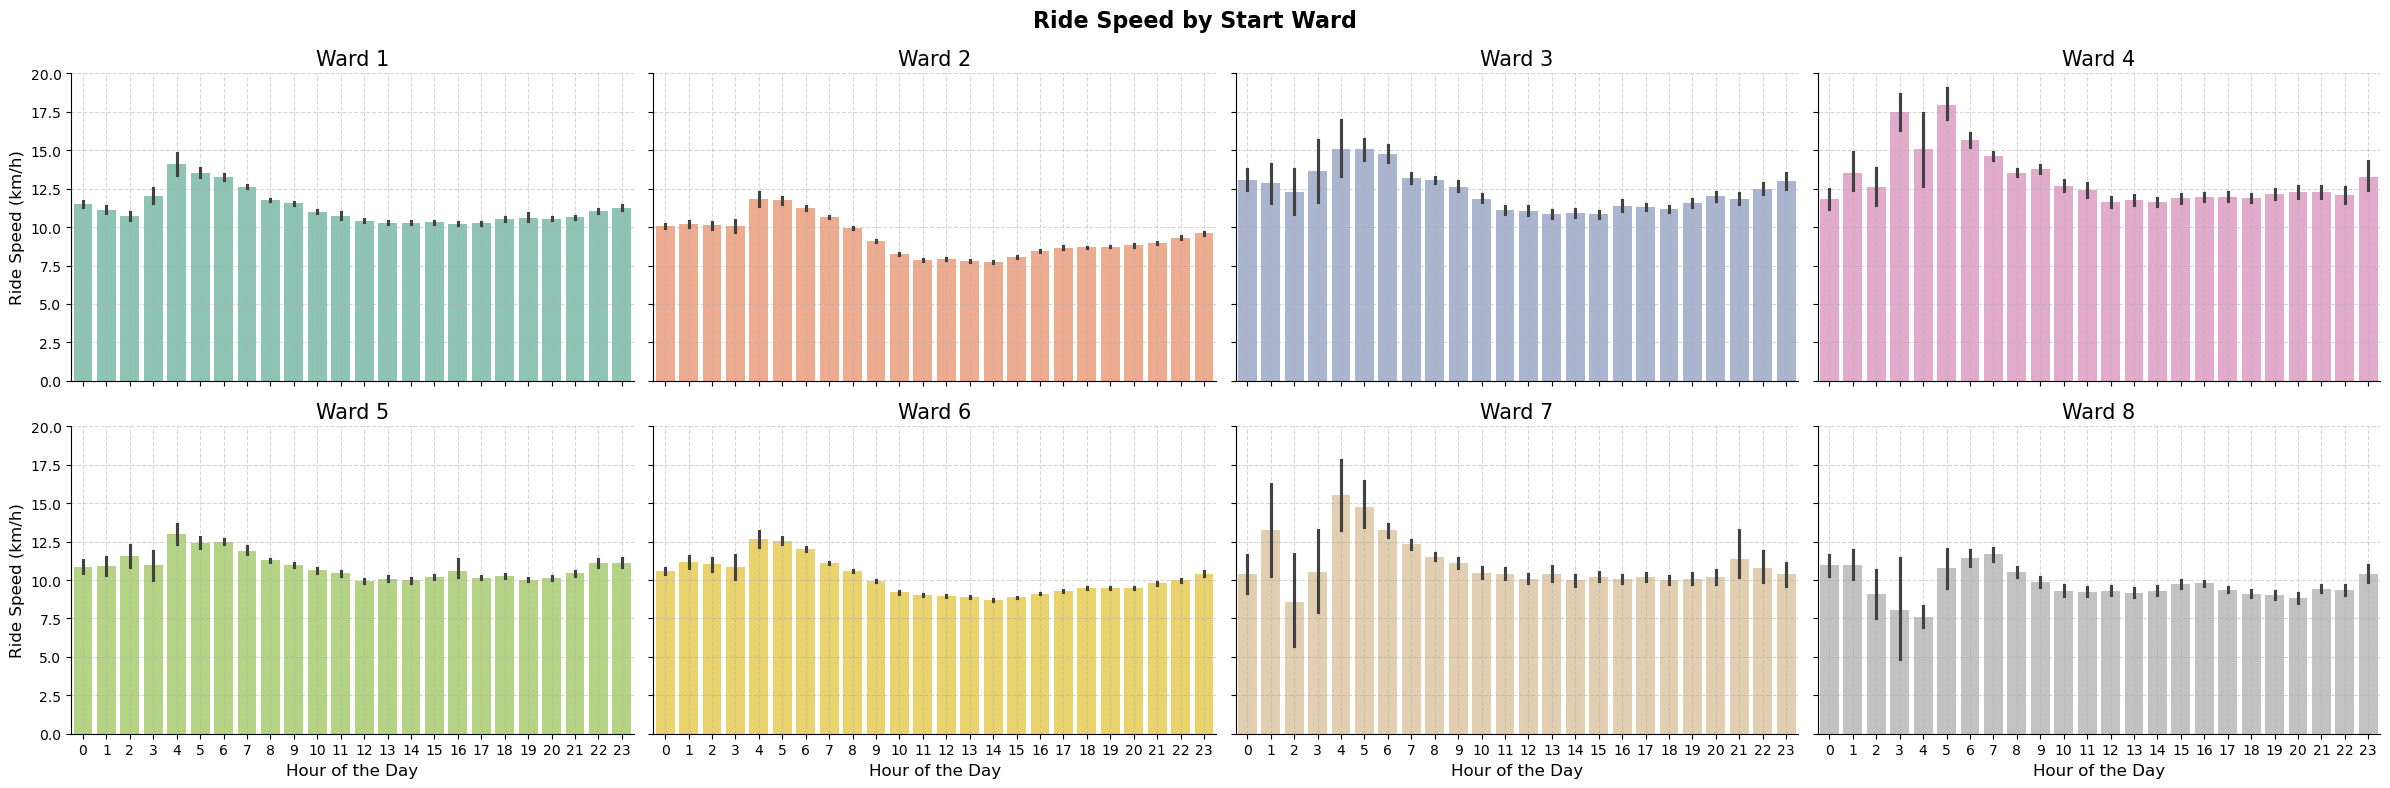

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="hour", 
    y="speed_ride", 
    data=fdf_gdf, 
    hue="start_ward", 
    kind="bar", 
    col="start_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,  # Set aspect ratio for better visuals
    legend=False,
    alpha=0.8,  # Slight transparency for better visibility
    palette="Set2"  # Use a colorblind-friendly palette
)

# Adjust axes labels and titles
g.set_xlabels("Hour of the Day", fontsize=12)  # Bigger X label
g.set_ylabels("Ride Speed (km/h)", fontsize=12)
g.set_titles("Ward {col_name}", size=15)

# # Rotate x-axis labels for better readability
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Improve Y-axis readability
for ax in g.axes.flat:
    ax.grid(True, linestyle="--", alpha=0.5)  # Add gridlines for better readability

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust space between the title and subplots

# Set the main title
g.fig.suptitle('Ride Speed by Start Ward', fontsize=16, fontweight="bold")

# Show the plot
plt.show()


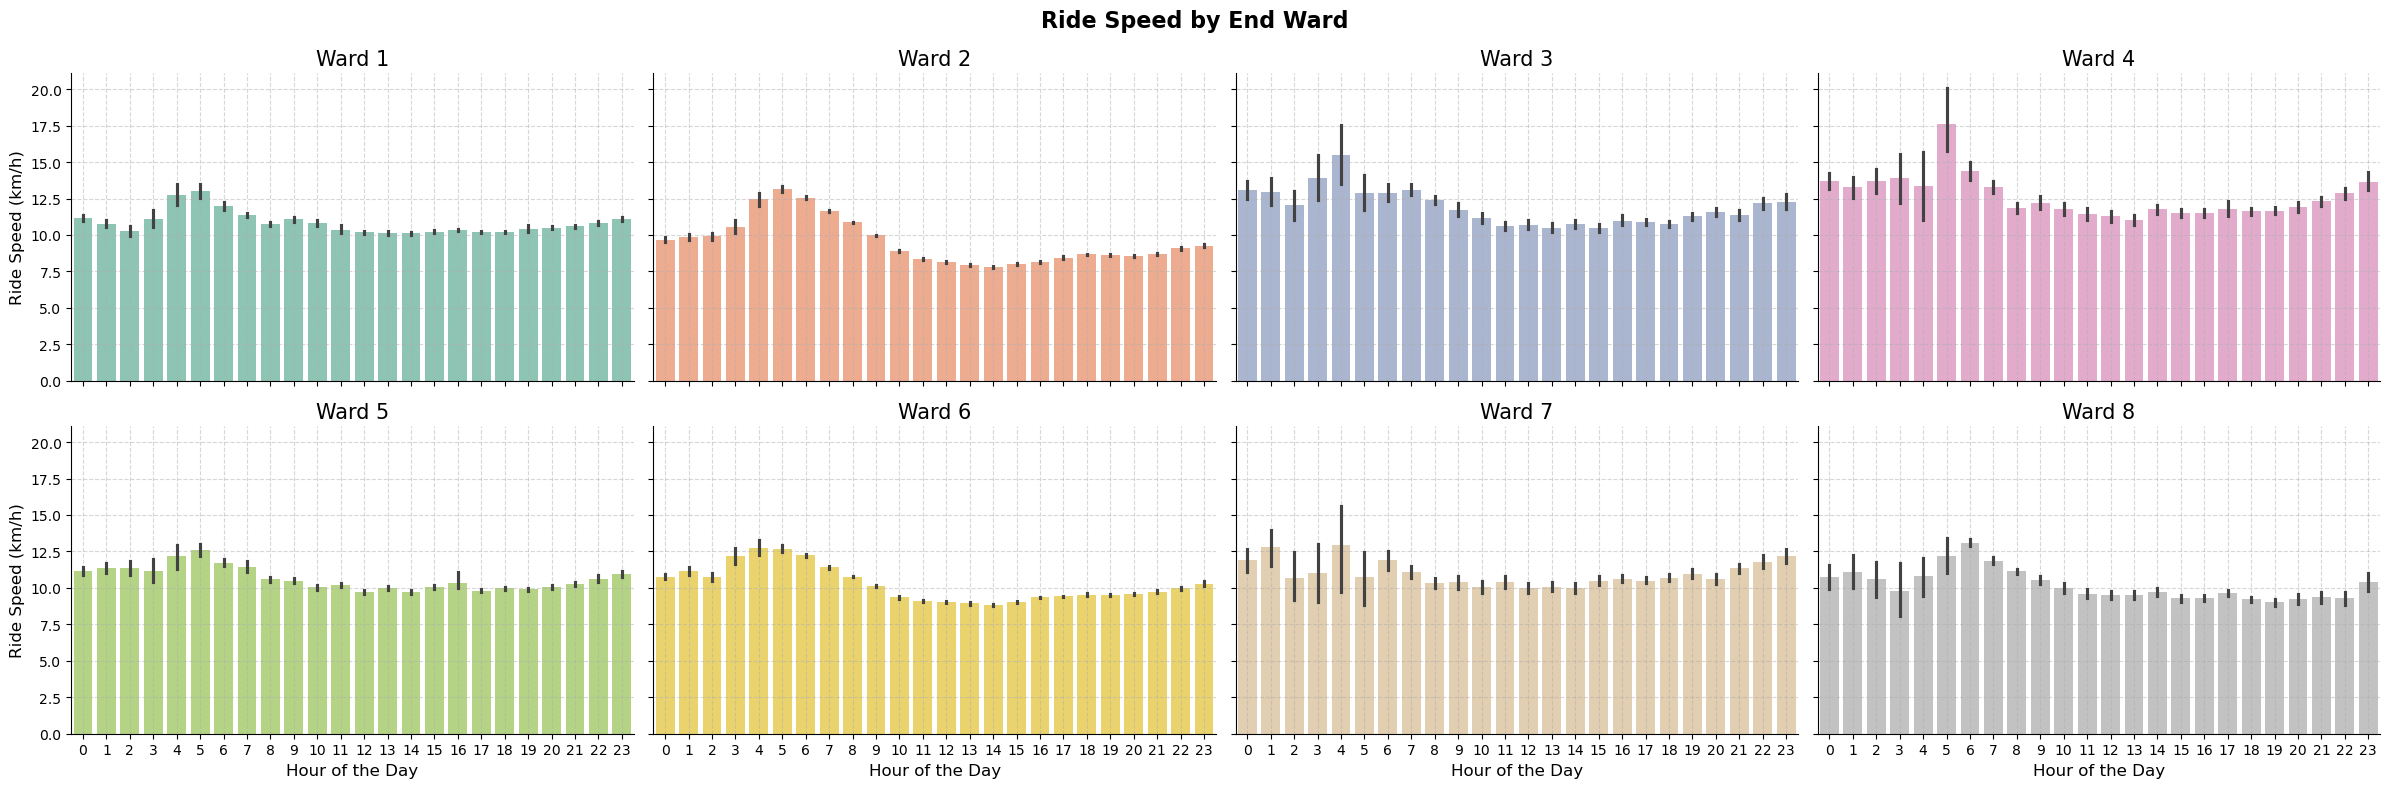

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="hour", 
    y="speed_ride", 
    data=fdf_gdf, 
    hue="end_ward", 
    kind="bar", 
    col="end_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,  # Set aspect ratio for better visuals
    legend=False,
    alpha=0.8,  # Slight transparency for better visibility
    palette="Set2"  # Use a colorblind-friendly palette
)

# Adjust axes labels and titles
g.set_xlabels("Hour of the Day", fontsize=12)  # Bigger X label
g.set_ylabels("Ride Speed (km/h)", fontsize=12)
g.set_titles("Ward {col_name}", size=15)

# # Rotate x-axis labels for better readability
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Improve Y-axis readability
for ax in g.axes.flat:
    ax.grid(True, linestyle="--", alpha=0.5)  # Add gridlines for better readability

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust space between the title and subplots

# Set the main title
g.fig.suptitle('Ride Speed by End Ward', fontsize=16, fontweight="bold")

# Show the plot
plt.show()

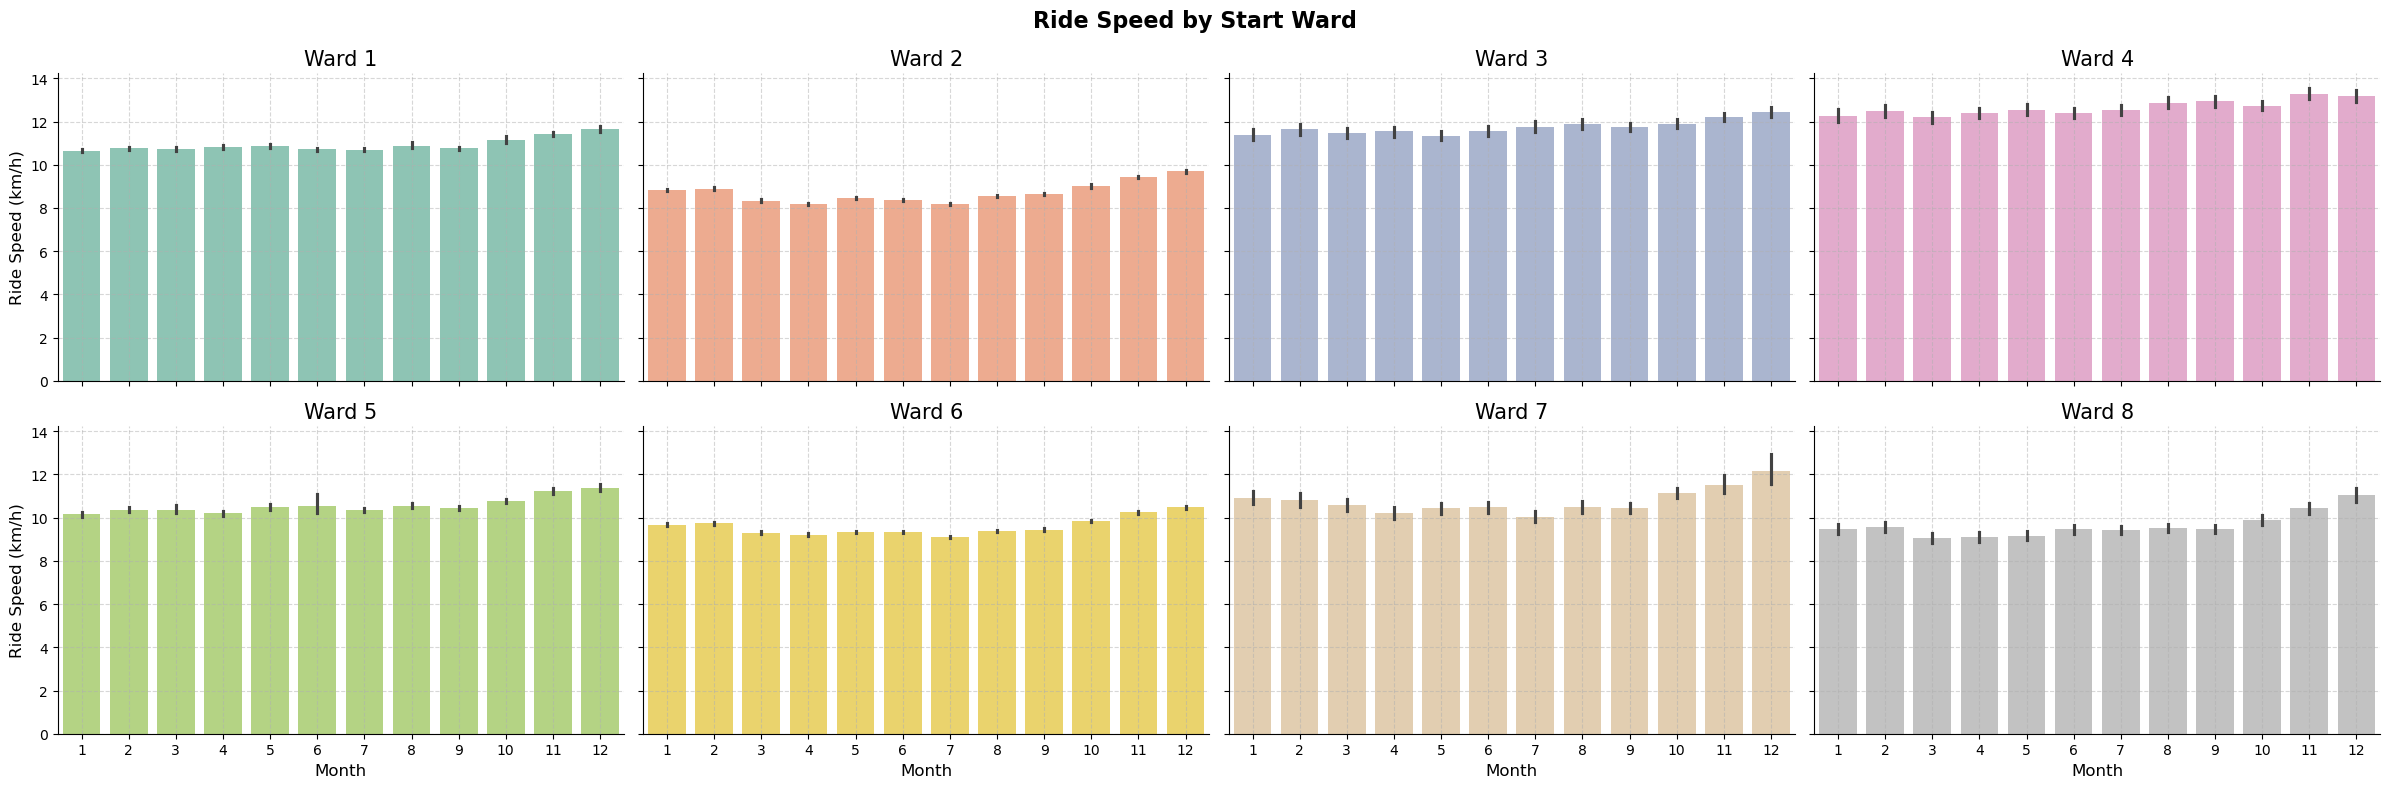

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="month", 
    y="speed_ride", 
    data=fdf_gdf, 
    hue="start_ward", 
    kind="bar", 
    col="start_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,  # Set aspect ratio for better visuals
    legend=False,
    alpha=0.8,  # Slight transparency for better visibility
    palette="Set2"  # Use a colorblind-friendly palette
)

# Adjust axes labels and titles
g.set_xlabels("Month", fontsize=12)  # Bigger X label
g.set_ylabels("Ride Speed (km/h)", fontsize=12)
g.set_titles("Ward {col_name}", size=15)

# # Rotate x-axis labels for better readability
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Improve Y-axis readability
for ax in g.axes.flat:
    ax.grid(True, linestyle="--", alpha=0.5)  # Add gridlines for better readability

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust space between the title and subplots

# Set the main title
g.fig.suptitle('Ride Speed by Start Ward', fontsize=16, fontweight="bold")

# Show the plot
plt.show()

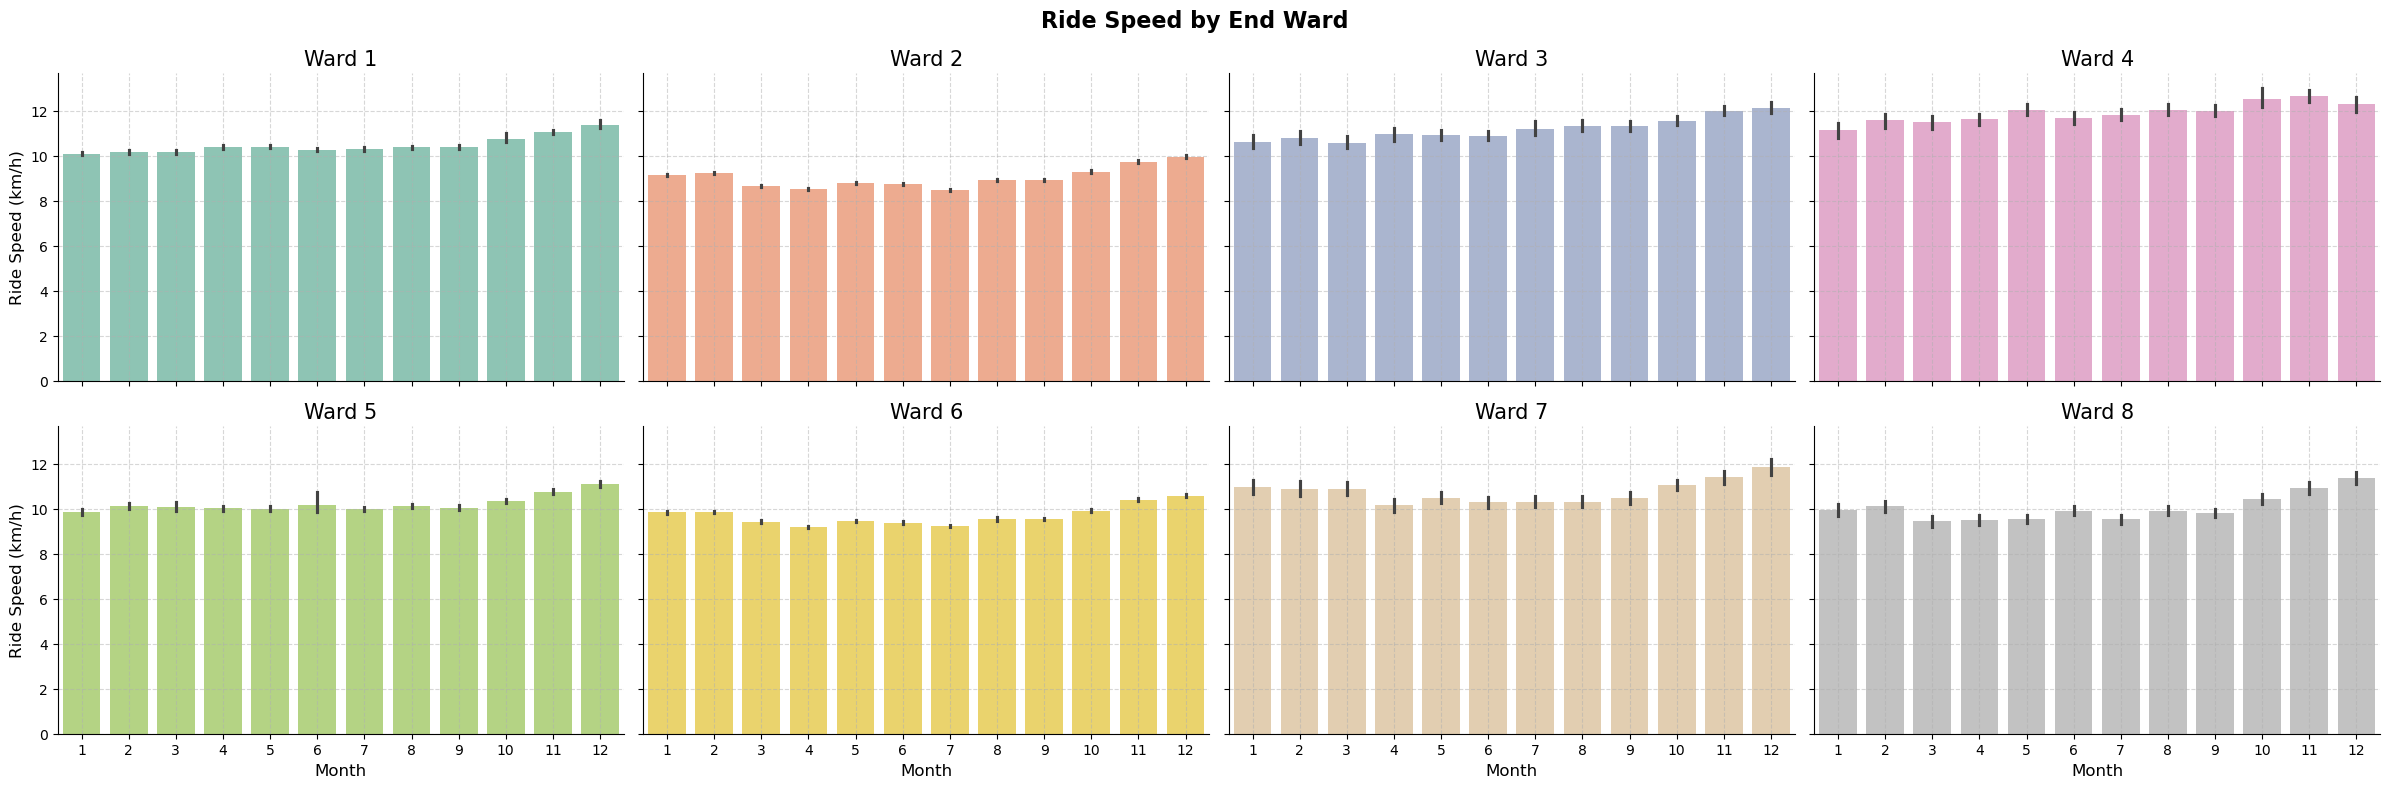

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the seaborn FacetGrid with barplots
g = sns.catplot(
    x="month", 
    y="speed_ride", 
    data=fdf_gdf, 
    hue="end_ward", 
    kind="bar", 
    col="end_ward", 
    col_wrap=4,  # 4 plots per row
    height=4,  # Set height of each subplot
    aspect=1.5,  # Set aspect ratio for better visuals
    legend=False,
    alpha=0.8,  # Slight transparency for better visibility
    palette="Set2"  # Use a colorblind-friendly palette
)

# Adjust axes labels and titles
g.set_xlabels("Month", fontsize=12)  # Bigger X label
g.set_ylabels("Ride Speed (km/h)", fontsize=12)
g.set_titles("Ward {col_name}", size=15)

# # Rotate x-axis labels for better readability
# for ax in g.axes.flat:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Improve Y-axis readability
for ax in g.axes.flat:
    ax.grid(True, linestyle="--", alpha=0.5)  # Add gridlines for better readability

# Adjust spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust space between the title and subplots

# Set the main title
g.fig.suptitle('Ride Speed by End Ward', fontsize=16, fontweight="bold")

# Show the plot
plt.show()

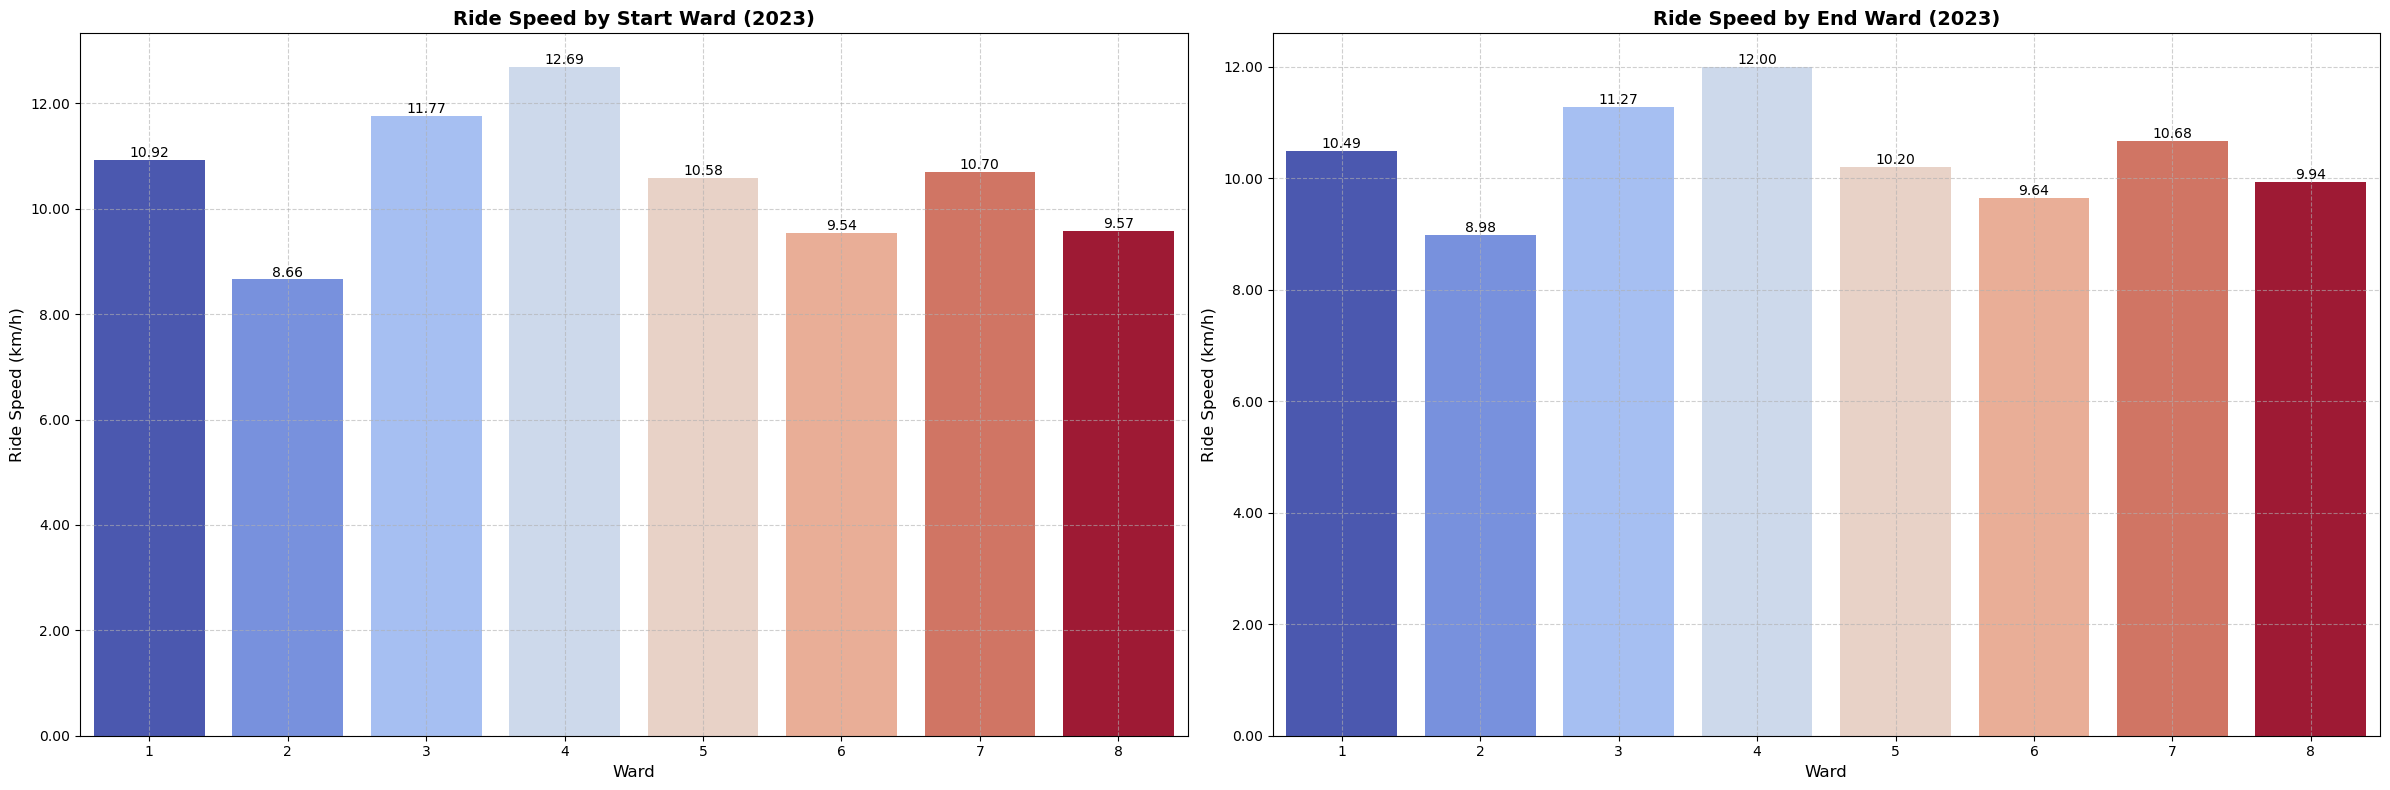

In [73]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Distance by Start Ward
sns.barplot(x="start_ward", 
            y="speed_ride", 
            data=fdf_gdf,
            palette="coolwarm",
            hue="start_ward",  
            errorbar=None,
            ax=axs[0],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    if height > 0.01:
        axs[0].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Speed (km/h)", fontsize=12)
axs[0].set_title("Ride Speed by Start Ward (2023)", fontsize=14, fontweight="bold")

# Plot for Ride Distance by End Ward
sns.barplot(x="end_ward", 
            y="speed_ride", 
            data=fdf_gdf,
            palette="coolwarm",
            hue="end_ward", 
            errorbar=None,
            ax=axs[1],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    if height > 0.01:
        axs[1].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Speed (km/h)", fontsize=12)
axs[1].set_title("Ride Speed by End Ward (2023)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [74]:
# Calculate speed in km/h if not already calculated
if 'speed_ride' not in fdf_gdf.columns:
	fdf_gdf['speed_ride'] = fdf_gdf['distance'] / (fdf_gdf['ride_duration_min'] / 60)

# Calculate the average ride speed
average_speed = fdf_gdf['speed_ride'].mean()

# Return the average ride speed
average_speed

9.618888169870322

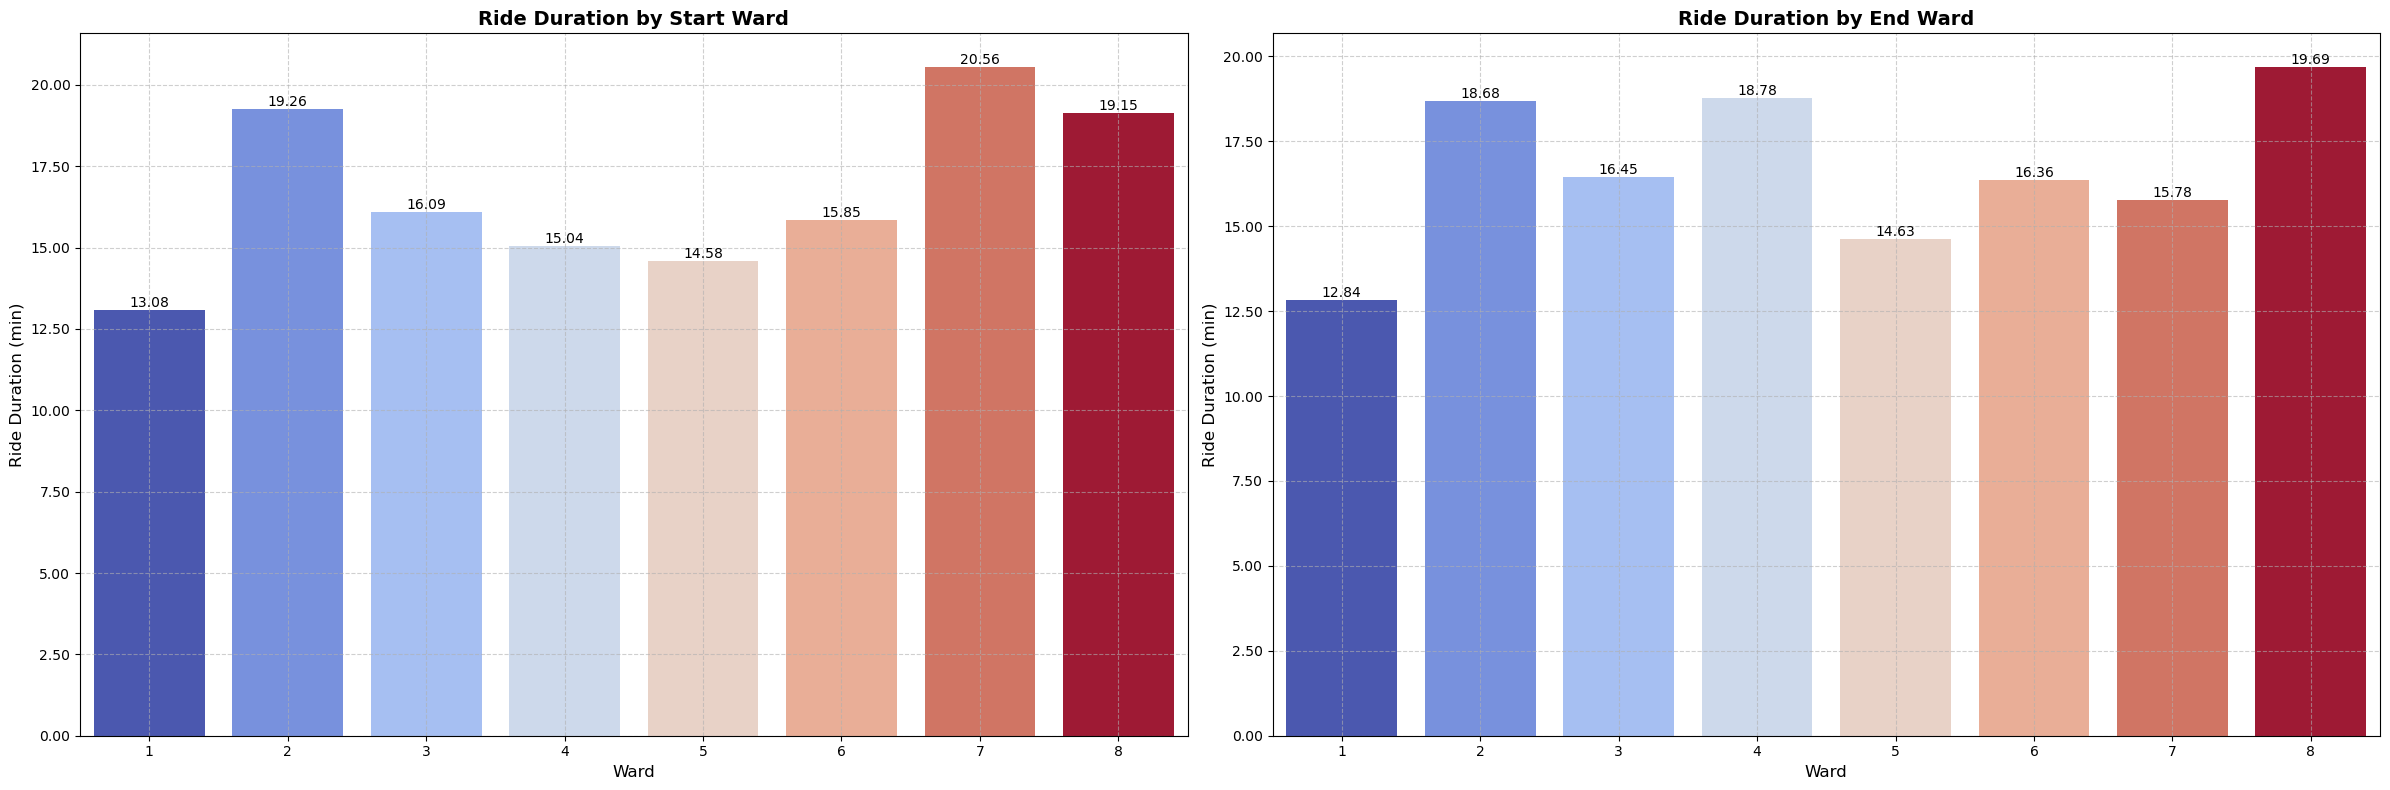

In [75]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Distance by Start Ward
sns.barplot(x="start_ward", 
            y="ride_duration_min", 
            data=fdf_gdf,
            palette="coolwarm",
            hue="start_ward",  
            errorbar=None,
            ax=axs[0],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    if height > 0.01:
        axs[0].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Duration (min)", fontsize=12)
axs[0].set_title("Ride Duration by Start Ward", fontsize=14, fontweight="bold")

# Plot for Ride Distance by End Ward
sns.barplot(x="end_ward", 
            y="ride_duration_min", 
            data=fdf_gdf,
            palette="coolwarm",
            hue="end_ward", 
            errorbar=None,
            ax=axs[1],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    if height > 0.01:
        axs[1].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Duration (min)", fontsize=12)
axs[1].set_title("Ride Duration by End Ward", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [76]:
# Group by ward and bike type (electric vs classic)
bike_type_by_ward = fdf_gdf.groupby(['start_ward', 'rideable_type']).size().reset_index(name='trip_count')

# Pivot the table for easier comparison
bike_type_pivot = bike_type_by_ward.pivot(index='start_ward', columns='rideable_type', values='trip_count').fillna(0)

# Show the result
print(bike_type_pivot)


rideable_type  classic_bike  docked_bike  electric_bike
start_ward                                             
1                     88231          864          43889
2                    270840        13021          71282
3                     13629          266           9253
4                      9720          107          11011
5                     41386          506          20281
6                    170271         4437          43994
7                      7716           75           3278
8                     11648          261           3817


C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\1170799742.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



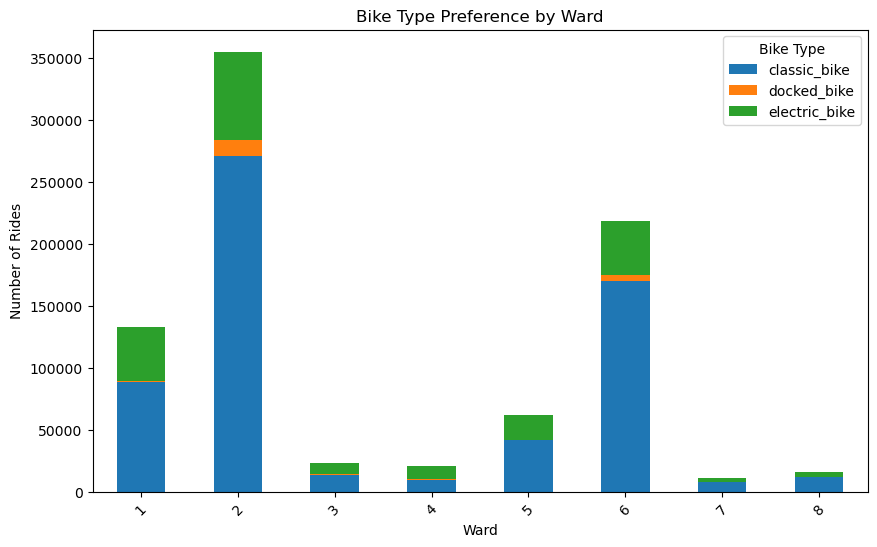

In [77]:
import matplotlib.pyplot as plt

# Plot a bar chart for bike type preference by ward
bike_type_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Bike Type Preference by Ward')
plt.ylabel('Number of Rides')
plt.xlabel('Ward')
plt.xticks(rotation=45)
plt.legend(title='Bike Type')
plt.show()


In [78]:
# import matplotlib.pyplot as plt

# # Group the data by ward and bike type (electric, classic, docked)
# bike_type_by_ward = fdf_gdf.groupby(['start_ward', 'rideable_type'], observed=True).size().reset_index(name='trip_count')

# # Pivot the table for easier plotting
# bike_type_pivot = bike_type_by_ward.pivot(index='start_ward', columns='rideable_type', values='trip_count').fillna(0)

# # Create a figure with subplots, one pie chart per ward
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust rows and cols based on number of wards
# axes = axes.flatten()  # Flatten the axes array to easily access each subplot

# # Define custom colors for each bike type
# bike_colors = {'electric_bike': 'lightcoral', 'classic_bike': 'lightblue', 'docked_bike': 'lightgreen'}

# # Plot a pie chart for each ward
# for i, ward in enumerate(bike_type_pivot.index):
#     # Get the data for the current ward
#     ward_data = bike_type_pivot.loc[ward]
    
#     # Ensure the pie chart includes all bike types (even if some have 0 rides)
#     sizes = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].values
#     labels = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].index
#     colors = [bike_colors[label] for label in labels]  # Get the colors for each bike type

#     # Plot the pie chart for the current ward
#     axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
#     axes[i].set_title(f'Ward {ward}')  # Title for each ward

# # Adjust layout for better spacing between subplots
# plt.tight_layout()
# plt.show()


### Bike Type Distribution

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by ward and bike type (electric, classic, docked)
bike_type_by_ward = fdf_gdf.groupby(['start_ward', 'rideable_type'], observed=True).size().reset_index(name='trip_count')

# Pivot the table for easier plotting
bike_type_pivot = bike_type_by_ward.pivot(index='start_ward', columns='rideable_type', values='trip_count').fillna(0)

# Determine the number of wards
num_wards = len(bike_type_pivot)

# Create a figure with 2 rows and 4 columns (2x4 grid)
ncols = 4  # 4 columns
nrows = 2  # 2 rows

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))  # Adjust figsize as necessary
axes = axes.flatten()  # Flatten the axes array to easily access each subplot

# Define custom colors for each bike type
bike_colors = {'electric_bike': 'lightcoral', 'classic_bike': 'lightblue', 'docked_bike': 'lightgreen'}

# Plot a pie chart for each ward
for i, ward in enumerate(bike_type_pivot.index):
    # Get the data for the current ward
    ward_data = bike_type_pivot.loc[ward]
    
    # Ensure the pie chart includes all bike types (even if some have 0 rides)
    sizes = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].values
    labels = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].index
    colors = [bike_colors[label] for label in labels]  # Get the colors for each bike type

    # Plot the pie chart for the current ward
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f'Ward {ward}')  # Title for each ward

# Remove any empty subplots if there are fewer wards than 8
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the unused subplots

# Adjust layout for better spacing between subplots
plt.subplots_adjust(hspace=0.0, wspace=0.4)  # Set vertical space between rows to 0 and horizontal spacing to 0.3

plt.show()



In [96]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Group the data by ward and bike type (electric, classic, docked)
bike_type_by_ward = fdf_gdf.groupby(['start_ward', 'rideable_type'], observed=True).size().reset_index(name='trip_count')

# Pivot the table for easier plotting
bike_type_pivot = bike_type_by_ward.pivot(index='start_ward', columns='rideable_type', values='trip_count').fillna(0)

# Determine the number of wards
num_wards = len(bike_type_pivot)

# Create a figure with 2 rows and 4 columns (2x4 grid)
ncols = 4  # 4 columns
nrows = 2  # 2 rows

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array to easily access each subplot

# Generate coolwarm colors dynamically
cmap = cm.get_cmap('coolwarm', 3)  # Get 3 colors from coolwarm
bike_colors = {
    'electric_bike': cmap(0),
    'classic_bike': cmap(1),
    'docked_bike': cmap(2)
}

# Plot a pie chart for each ward
for i, ward in enumerate(bike_type_pivot.index):
    ward_data = bike_type_pivot.loc[ward]
    
    # Ensure the pie chart includes all bike types (even if some have 0 rides)
    sizes = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].values
    labels = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].index
    colors = [bike_colors[label] for label in labels]  # Get the colors for each bike type

    # Plot the pie chart for the current ward
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

    # Highlight Ward 2 and Ward 7 titles
    if ward in [2, 7]:
        axes[i].set_title(f'Ward {ward}', fontsize=14, fontweight='bold', color='red')
    else:
        axes[i].set_title(f'Ward {ward}', fontsize=12, fontweight='normal')

# Remove any empty subplots if there are fewer wards than 8
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the unused subplots

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.05, wspace=0.5)  # Reduce vertical space

plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\61647815.py:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\1896709901.py:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



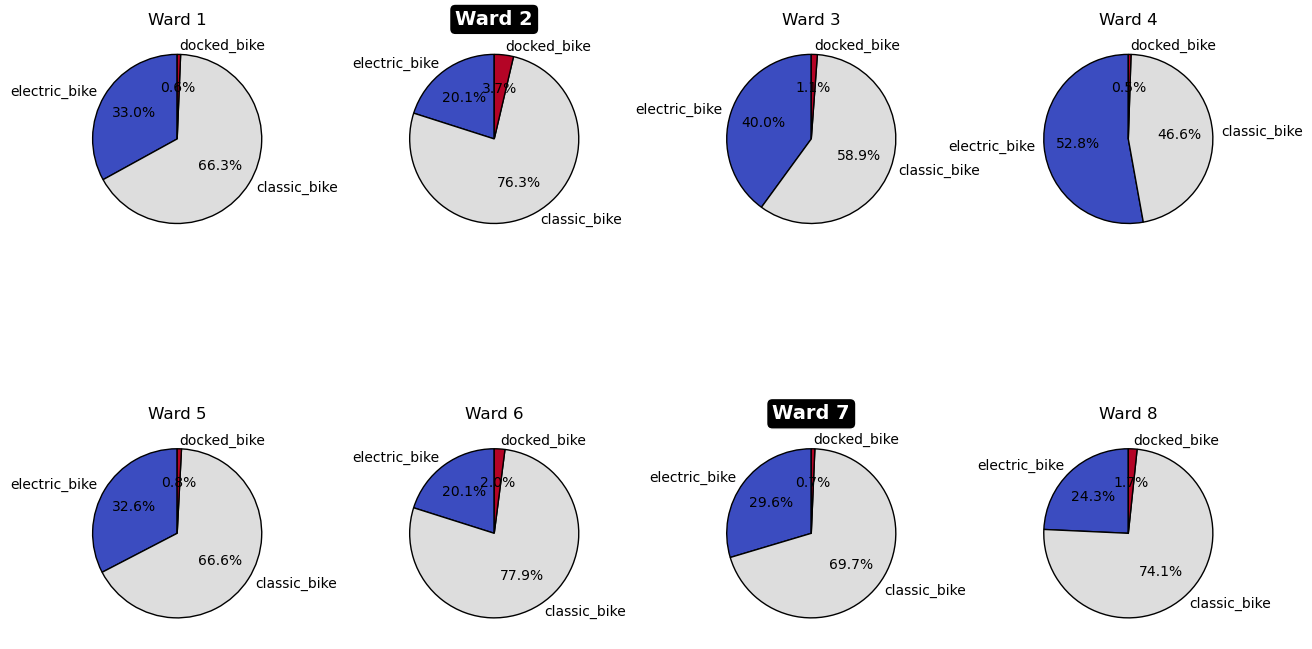

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Group the data by ward and bike type (electric, classic, docked)
bike_type_by_ward = fdf_gdf.groupby(['start_ward', 'rideable_type'], observed=True).size().reset_index(name='trip_count')

# Pivot the table for easier plotting
bike_type_pivot = bike_type_by_ward.pivot(index='start_ward', columns='rideable_type', values='trip_count').fillna(0)

# Determine the number of wards
num_wards = len(bike_type_pivot)

# Create a figure with 2 rows and 4 columns (2x4 grid)
ncols = 4  # 4 columns
nrows = 2  # 2 rows

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array to easily access each subplot

# Generate coolwarm colors dynamically
cmap = cm.get_cmap('coolwarm', 3)  # Get 3 colors from coolwarm
bike_colors = {
    'electric_bike': cmap(0),
    'classic_bike': cmap(1),
    'docked_bike': cmap(2)
}

# Plot a pie chart for each ward
for i, ward in enumerate(bike_type_pivot.index):
    ward_data = bike_type_pivot.loc[ward]
    
    # Ensure the pie chart includes all bike types (even if some have 0 rides)
    sizes = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].values
    labels = ward_data[['electric_bike', 'classic_bike', 'docked_bike']].index
    colors = [bike_colors[label] for label in labels]  # Get the colors for each bike type

    # Plot the pie chart for the current ward
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

    # Highlight Ward 2 and Ward 7 with white text on a black background
    if ward in [2, 7]:
        axes[i].set_title(f'Ward {ward}', fontsize=14, fontweight='bold', color='white',
                          bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.3'))
    else:
        axes[i].set_title(f'Ward {ward}', fontsize=12, fontweight='normal')

# Remove any empty subplots if there are fewer wards than 8
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the unused subplots

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.05, wspace=0.5)  # Reduce vertical space

plt.show()


In [100]:
# Group by ward and bike type to calculate counts
bike_type_distribution = fdf_gdf.groupby(['start_ward', 'rideable_type']).size().reset_index(name='count')

# Normalize the counts to get percentages
bike_type_distribution['percentage'] = bike_type_distribution.groupby('start_ward')['count'].transform(lambda x: (x / x.sum()) * 100)

# Pivot the table for better readability
bike_type_distribution_pivot = bike_type_distribution.pivot(index='start_ward', columns='rideable_type', values='percentage').fillna(0)

# Group by bike type to calculate counts for the whole city
city_bike_type_distribution = fdf_gdf.groupby('rideable_type').size().reset_index(name='count')

# Normalize the counts to get percentages
city_bike_type_distribution['percentage'] = (city_bike_type_distribution['count'] / city_bike_type_distribution['count'].sum()) * 100

# Display the result
print(city_bike_type_distribution)


   rideable_type   count  percentage
0   classic_bike  613441   73.047561
1    docked_bike   19537    2.326434
2  electric_bike  206805   24.626005


C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\3776638530.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\raclo\AppData\Local\Temp\ipykernel_16172\3776638530.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [102]:
city_bike_type_distribution.drop(columns=['count'], inplace=True)

In [103]:
city_bike_type_distribution

rideable_type  percentage
0   classic_bike   73.047561
1    docked_bike    2.326434
2  electric_bike   24.626005

### Number of stations for Ward 2 and 7


In [80]:
# Filter for Ward 2 and Ward 7
ward_2_stations = fdf_gdf[fdf_gdf['start_ward'] == 2]['start_station_name'].nunique()
ward_7_stations = fdf_gdf[fdf_gdf['start_ward'] == 7]['start_station_name'].nunique()

print(f"Total number of stations in Ward 2: {ward_2_stations}")
print(f"Total number of stations in Ward 7: {ward_7_stations}")

Total number of stations in Ward 2: 157
Total number of stations in Ward 7: 39


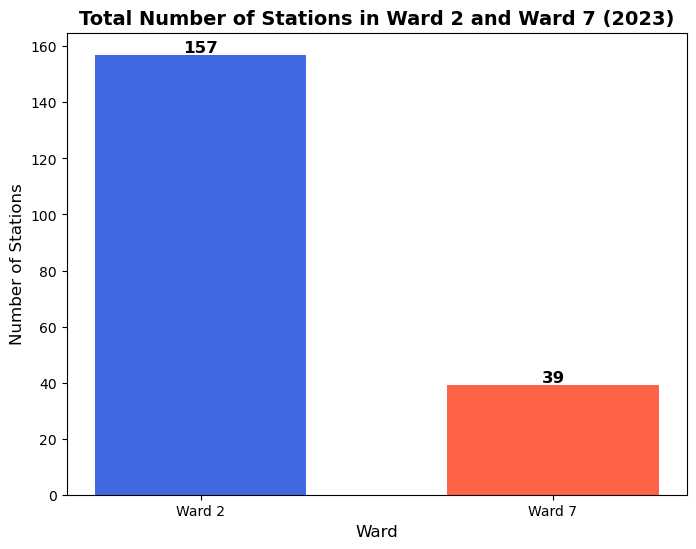

In [81]:
import matplotlib.pyplot as plt

# Ensure ward_2_stations and ward_7_stations are defined
ward_2_stations = fdf_gdf[fdf_gdf['start_ward'] == 2]['start_station_name'].nunique()
ward_7_stations = fdf_gdf[fdf_gdf['start_ward'] == 7]['start_station_name'].nunique()

# Data for the plot
wards = ['Ward 2', 'Ward 7']
stations = [ward_2_stations, ward_7_stations]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(wards, stations, color=['royalblue', 'tomato'], width=0.6)

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Position slightly above the bar
            f"{int(bar.get_height()):,}",  # Format with commas (adjust if needed)
            ha='center', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.title('Total Number of Stations in Ward 2 and Ward 7 (2023)', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines


In [82]:
import pandas as pd

# Count rides starting from each station
start_counts = fdf_gdf['start_station_name'].value_counts()

# Count rides ending at each station
end_counts = fdf_gdf['end_station_name'].value_counts()

# Merge both counts into a DataFrame
station_usage = pd.DataFrame({'start_usage': start_counts, 'end_usage': end_counts})

# Fill NaN values with 0 (some stations might only appear in one column)
station_usage.fillna(0, inplace=True)

# Compute total usage (start + end)
station_usage['total_usage'] = station_usage['start_usage'] + station_usage['end_usage']

# Sort by most-used stations
station_usage = station_usage.sort_values(by='total_usage', ascending=False)

# Display the top stations
print(station_usage.head(10))  # Show top 10 most-used stations


                                                    start_usage  end_usage  \
0                                                         35830        0.0   
Columbus Circle / Union Station                           11003    11423.0   
New Hampshire Ave & T St NW                                9692     9847.0   
15th & P St NW                                             8708     9069.0   
5th & K St NW                                              7985     8445.0   
1st & M St NE                                              7836     8256.0   
Eastern Market Metro / Pennsylvania Ave & 8th S...         7905     8109.0   
14th & V St NW                                             7629     7440.0   
Massachusetts Ave & Dupont Circle NW                       7268     7635.0   
8th & O St NW                                              6711     6879.0   

                                                    total_usage  
0                                                       35830.0  
Columbus 

In [83]:
fdf_gdf

ride_id  rideable_type          started_at            ended_at  \
1         7368109  electric_bike 2023-05-05 10:57:59 2023-05-05 11:21:16   
2         6480084   classic_bike 2023-02-08 17:29:29 2023-02-08 17:52:32   
3         6546649   classic_bike 2023-02-17 10:40:44 2023-02-17 10:52:14   
4         8494852   classic_bike 2023-07-21 21:31:20 2023-07-21 21:38:29   
6        10613115  electric_bike 2023-12-19 17:34:05 2023-12-19 17:39:06   
...           ...            ...                 ...                 ...   
1116828   6854212    docked_bike 2023-03-26 11:02:45 2023-03-26 11:54:22   
1116829   7539054  electric_bike 2023-05-17 14:57:06 2023-05-17 15:04:30   
1116830   9710112   classic_bike 2023-10-10 06:59:57 2023-10-10 07:04:04   
1116831   7412461  electric_bike 2023-05-08 13:24:24 2023-05-08 13:33:02   
1116832   6404110   classic_bike 2023-01-27 20:24:13 2023-01-27 20:31:11   

                                        start_station_name  start_station_id  \
1                                                        0               0.0   
2                                       Hamlin & 7th St NE           31514.0   
3                                   Eckington Pl & Q St NE           31505.0   
4                           New Hampshire Ave & Ward Pl NW           31212.0   
6                                     14th & Belmont St NW           31119.0   
...                                                    ...               ...   
1116828   Ohio Dr & West Basin Dr SW / MLK & FDR Memorials           31240.0   
1116829  Loughboro Rd & Dalecarlia Pkwy NW / Sibley Hos...           31334.0   
1116830                                      6th & H St NE           31615.0   
1116831                        18th & New Hampshire Ave NW           31324.0   
1116832                          Connecticut Ave & R St NW           31299.0   

                                    end_station_name  end_station_id  \
1                      17th St & Rhode Island Ave NW         31210.0   
2                        Adams Mill & Columbia Rd NW         31104.0   
3                           New Jersey Ave & F St NW         31655.0   
4                                     16th & R St NW         31282.0   
6                                  14th & Otis Pl NW         31131.0   
...                                              ...             ...   
1116828  Henry Bacon Dr & Lincoln Memorial Circle NW         31289.0   
1116829              American University East Campus         31320.0   
1116830              Columbus Circle / Union Station         31623.0   
1116831                5th St & Massachusetts Ave NW         31265.0   
1116832                               14th & Q St NW         31327.0   

         start_lat  start_lng    end_lat    end_lng member_casual  distance  \
1        38.880000 -77.010000  38.906767 -77.038627        member  3.872587   
2        38.927497 -76.997194  38.922849 -77.042525        casual  3.955272   
3        38.910972 -77.004950  38.897108 -77.011616        member  1.645987   
4        38.905711 -77.047318  38.912652 -77.036278        casual  1.228064   
6        38.921051 -77.031750  38.934405 -77.032687        member  1.487133   
...            ...        ...        ...        ...           ...       ...   
1116828  38.884120 -77.046570  38.890539 -77.049383        casual  0.754143   
1116829  38.935900 -77.106693  38.936298 -77.087128        casual  1.692807   
1116830  38.899972 -76.998347  38.896960 -77.004930        member  0.660840   
1116831  38.911218 -77.041814  38.900930 -77.018677        member  2.305842   
1116832  38.912644 -77.045640  38.910674 -77.031880        casual  1.210534   

         month  year  season day_of_week holiday is_weekend   ride_duration  \
1            5  2023  Spring      Friday      No         No 0 days 00:23:17   
2            2  2023  Winter   Wednesday      No         No 0 days 00:23:03   
3            2  2023  Winter      Friday      No         No 0 days 00:11:30   
4     